In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

# 데이터 분석
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler

# 선형 회귀 분석
from statsmodels.formula.api import ols
from statsmodels.api import qqplot, add_constant
import statsmodels.api as sm
import statsmodels.formula.api as smf
# from stats.tools.eval_measures import rmse

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as smf

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

from sklearn.tree import export_graphviz
from sklearn.model_selection import GridSearchCV
import graphviz


import ast

def root_mean_squared_error(y_true,y_pred):
    return np.sqrt(mean_squared_error(y_true,y_pred))

def mean_absolute_percentage_error(y_true,y_pred):
    return np.mean(np.abs((y_true-y_pred)/y_true)*100)


matplotlib.rc('font', family='NanumGothic')
matplotlib.rcParams['axes.unicode_minus'] = False


# 시계열 분석

In [229]:
df=pd.read_csv('/home/pirl/Downloads/wine_data_sales.csv',engine='python',encoding='euc-kr',parse_dates=['date'])
df.head()


,Unnamed: 0,date,gender,age,job,marital,province,city,purchase,amount
0,0,2016-05-01,FEMALE,30대,임시직,SINGLE,충청도,청주시,"['D', 'F', 'D', 'G']",100
1,1,2016-05-01,FEMALE,30대,변호사,MARREID,서울시,양천구,"['C', 'G', 'E']",60
2,2,2016-05-01,MALE,60대 이상,회사직원,SINGLE,부산시,연제구,"['B', 'F']",30
3,3,2016-05-01,FEMALE,40대,중소기업직원,MARREID,서울시,양천구,['C'],15
4,4,2016-05-01,FEMALE,50대,의사,MARREID,경상도,거제시,"['G', 'A', 'B']",75


In [230]:
df_raw=pd.read_csv('/home/pirl/Downloads/check_wine_data_sales.csv',engine='python',encoding='euc-kr',parse_dates=['date'])
df.head()

,Unnamed: 0,date,gender,age,job,marital,province,city,purchase,amount
0,0,2016-05-01,FEMALE,30대,임시직,SINGLE,충청도,청주시,"['D', 'F', 'D', 'G']",100
1,1,2016-05-01,FEMALE,30대,변호사,MARREID,서울시,양천구,"['C', 'G', 'E']",60
2,2,2016-05-01,MALE,60대 이상,회사직원,SINGLE,부산시,연제구,"['B', 'F']",30
3,3,2016-05-01,FEMALE,40대,중소기업직원,MARREID,서울시,양천구,['C'],15
4,4,2016-05-01,FEMALE,50대,의사,MARREID,경상도,거제시,"['G', 'A', 'B']",75


In [231]:
df= df.drop('Unnamed: 0',axis=1)

## 변동 추세 확인

In [232]:
df_time=df.groupby(['date']).agg(np.sum)
df_raw_time=df_raw.groupby(['date']).agg(np.sum)

In [233]:
df_time.head()

,amount
date,
2016-05-01,33450
2016-05-02,29850
2016-05-03,33675
2016-05-04,33480
2016-05-05,33900


In [234]:
df_raw_time.index

DatetimeIndex(['2016-05-01', '2016-05-02', '2016-05-03', '2016-05-04',
               '2016-05-05', '2016-05-06', '2016-05-07', '2016-05-08',
               '2016-05-09', '2016-05-10',
               ...
               '2016-12-22', '2016-12-23', '2016-12-24', '2016-12-25',
               '2016-12-26', '2016-12-27', '2016-12-28', '2016-12-29',
               '2016-12-30', '2016-12-31'],
              dtype='datetime64[ns]', name='date', length=245, freq=None)

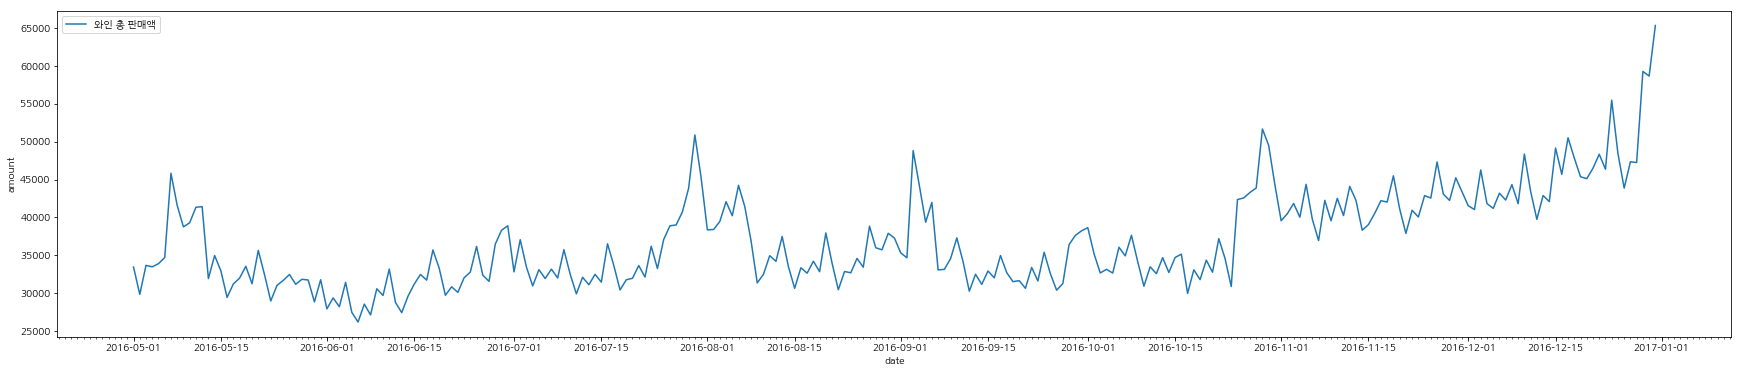

In [235]:
import matplotlib.dates as mdates
from matplotlib.dates import MonthLocator, DateFormatter,DayLocator,WeekdayLocator


plt.figure(figsize=(30, 6))
plt.xlabel('date')
plt.ylabel('amount')
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(DayLocator([1,15]))
plt.gca().xaxis.set_minor_locator(DayLocator())
plt.plot(pd.to_datetime(df_raw_time.index),df_raw_time['amount'],label='와인 총 판매액')
plt.legend()


In [236]:
df_time['dayofweek'] = df_time.index.weekday
week_dummies = pd.get_dummies(df_time['dayofweek'])
week_dummies.columns = ['dayofweek-'+ str(w) for w in range(0,7)]
df_time = pd.concat([df_time, week_dummies], axis=1, join_axes=[df_time.index]).drop(['dayofweek'],axis=1)
#Satday,Sunday
df_time['weekend'] = (df_time.index.dayofweek>4).astype(int)


In [237]:
tr_start,tr_end = '2016-05-01','2016-09-30'
te_start,te_end = '2016-10-01','2016-10-31'
tra = df_time['amount'][tr_start:tr_end].dropna()
tes = df_time['amount'][te_start:te_end].dropna()
# exog_train = df_time['id','store','item','sales'][tr_start:tr_end].dropna()
# exog_test = df_time['id','store','item','sales'][te_start:te_end].dropna()

In [238]:
df_time.head()

,amount,dayofweek-0,dayofweek-1,dayofweek-2,dayofweek-3,dayofweek-4,dayofweek-5,dayofweek-6,weekend
date,,,,,,,,,
2016-05-01,33450,0,0,0,0,0,0,1,1
2016-05-02,29850,1,0,0,0,0,0,0,0
2016-05-03,33675,0,1,0,0,0,0,0,0
2016-05-04,33480,0,0,1,0,0,0,0,0
2016-05-05,33900,0,0,0,1,0,0,0,0


In [239]:
res = sm.tsa.adfuller(df_time['amount'].dropna(),regression='ct')
print('p-value:{}'.format(res[1]))

p-value:0.0702280197553794


In [240]:
res = sm.tsa.adfuller(df_time['amount'].diff().dropna(),regression='c')
print('p-value:{}'.format(res[1]))

p-value:0.018989109984434552


In [241]:
# resDiff = sm.tsa.arma_order_select_ic(tra, max_ar=7, max_ma=7, ic='aic', trend='c')
# print('ARMA(p,q) =',resDiff['aic_min_order'],'is the best.')

In [242]:
special_event=['2016-05-07', '2016-05-08', # 5월 어버이날 스승의날
               '2016-05-09', '2016-05-10', # 5월 어버이날 스승의날
               '2016-05-11', '2016-05-12', # 5월 어버이날 스승의날
               '2016-07-26', '2016-07-27', '2016-07-28', '2016-07-29', # 여름휴가
               '2016-07-30', '2016-07-31', '2016-08-01', '2016-08-02', # 여름휴가
               '2016-08-03', '2016-08-04', '2016-08-05', '2016-08-06', '2016-08-07', # 여름휴가
               '2016-09-03', '2016-09-04', '2016-09-05', '2016-09-06', # 9월 추석 배송마감
               '2016-10-25', '2016-10-26', '2016-10-27', '2016-10-28', # 코리안 세일 페스타
               '2016-10-29', '2016-10-30', '2016-10-31'] # 코리안 세일 페스타
df_time['special_event'] = (df_time.index.isin(special_event)).astype(int)


In [243]:
df_time.head()

,amount,dayofweek-0,dayofweek-1,dayofweek-2,dayofweek-3,dayofweek-4,dayofweek-5,dayofweek-6,weekend,special_event
date,,,,,,,,,,
2016-05-01,33450,0,0,0,0,0,0,1,1,0
2016-05-02,29850,1,0,0,0,0,0,0,0,0
2016-05-03,33675,0,1,0,0,0,0,0,0,0
2016-05-04,33480,0,0,1,0,0,0,0,0,0
2016-05-05,33900,0,0,0,1,0,0,0,0,0


In [244]:
tr_start,tr_end = '2016-05-01','2016-09-30'
te_start,te_end = '2016-10-01','2016-10-31'
tra = df_time['amount'][tr_start:tr_end].dropna()
tes = df_time['amount'][te_start:te_end].dropna()
exog_train = df_time.drop(['amount'],axis = 1)[tr_start:tr_end].dropna()
exog_test = df_time.drop(['amount'],axis = 1)[te_start:te_end].dropna()

In [245]:
sarima = sm.tsa.statespace.SARIMAX(tra,order=(7,1,6),seasonal_order=(0,0,0,0),
                                enforce_stationarity=False, enforce_invertibility=False,exog = exog_train,
                                   freq='D').fit()
sarima.summary()

/home/pirl/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)
/home/pirl/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                 amount   No. Observations:                  153
Model:               SARIMAX(7, 1, 6)   Log Likelihood               -1275.945
Date:                Wed, 07 Aug 2019   AIC                           2597.891
Time:                        16:19:23   BIC                           2666.356
Sample:                    05-01-2016   HQIC                          2625.711
                         - 09-30-2016                                         
Covariance Type:                  opg                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
dayofweek-0   -1694.6944    412.254     -4.111      0.000   -2502.698    -886.690
dayofweek-1    -340.2165    338.483     -1.005      0.315   -1003.630     323.197
dayofweek-2    -393.1635    337.047     -1.166      0.243   -1053.764     267.437
dayofweek-3     931.9224    434.468      2.145      0.032      80.380    1783.465
dayofweek-4     -72.6160    441.569     -0.164      0.869    -938.075     792.843
dayofweek-5    2443.1492    362.752      6.735      0.000    1732.167    3154.131
dayofweek-6    -874.3813    458.487     -1.907      0.057   -1772.999      24.236
weekend        1568.7679    246.573      6.362      0.000    1085.493    2052.043
special_event  6168.3152    499.121     12.358      0.000    5190.056    7146.574
ar.L1            -1.0877      1.437     -0.757      0.449      -3.904       1.729
ar.L2            -0.3847      0.962     -0.400      0.689      -2.270       1.500
ar.L3            -0.3557      0.714     -0.498      0.618      -1.754       1.043
ar.L4             0.1665      0.472      0.353      0.724      -0.759       1.092
ar.L5             0.4837      0.396      1.221      0.222      -0.293       1.260
ar.L6             0.3321      0.758      0.438      0.661      -1.154       1.818
ar.L7             0.1163      0.218      0.533      0.594      -0.311       0.544
ma.L1             0.8515      1.443      0.590      0.555      -1.976       3.679
ma.L2            -0.1965      0.721     -0.272      0.785      -1.610       1.217
ma.L3            -0.2265      1.290     -0.176      0.861      -2.754       2.301
ma.L4            -0.5171      0.541     -0.956      0.339      -1.577       0.543
ma.L5            -0.4973      0.422     -1.177      0.239      -1.325       0.331
ma.L6            -0.2049      0.521     -0.393      0.694      -1.226       0.816
sigma2         2.756e+06      0.160   1.72e+07      0.000    2.76e+06    2.76e+06
===================================================================================
Ljung-Box (Q):                       41.17   Jarque-Bera (JB):                43.25
Prob(Q):                              0.42   Prob(JB):                         0.00
Heteroskedasticity (H):               1.60   Skew:                             0.45
Prob(H) (two-sided):                  0.10   Kurtosis:                         5.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.26e+22. Standard errors may be unstable.
"""

In [246]:
df_forecast = pd.DataFrame(index=pd.date_range("2016-10-31", "2016-12-31"))
df_forecast['amount'] = 0

In [247]:
df_forecast.iloc[0,0]=44300

In [248]:
df_forecast.head()

,amount
2016-10-31,44300
2016-11-01,0
2016-11-02,0
2016-11-03,0
2016-11-04,0


In [249]:
df_forecast['dayofweek'] = df_forecast.index.weekday
week_dummies = pd.get_dummies(df_forecast['dayofweek'],prefix='dayofweek')
df_forecast = pd.concat([df_forecast, week_dummies], axis=1, join_axes=[df_forecast.index]).drop(['dayofweek'],axis=1)

#Satday,Sunday
df_forecast['weekend'] = (df_forecast.index.weekday>4).astype(int)

#quarter
# df_forecast['quarter'] = df_forecast.index.month
# df_forecast['quarter'][df_forecast['quarter']==1]='1Q'
# df_forecast['quarter'][df_forecast['quarter']==2]='1Q'
# df_forecast['quarter'][df_forecast['quarter']==3]='1Q'
# df_forecast['quarter'][df_forecast['quarter']==4]='2Q'
# df_forecast['quarter'][df_forecast['quarter']==5]='2Q'
# df_forecast['quarter'][df_forecast['quarter']==6]='2Q'
# df_forecast['quarter'][df_forecast['quarter']==7]='3Q'
# df_forecast['quarter'][df_forecast['quarter']==8]='3Q'
# df_forecast['quarter'][df_forecast['quarter']==9]='3Q'
# df_forecast['quarter'][df_forecast['quarter']==10]='4Q'
# df_forecast['quarter'][df_forecast['quarter']==11]='4Q'
# df_forecast['quarter'][df_forecast['quarter']==12]='4Q'
# quarter_dummies = pd.get_dummies(df_forecast['quarter'],prefix='quarter')
# df_forecast = pd.concat([df_forecast, quarter_dummies], axis=1, join_axes=[df_forecast.index]).drop(['quarter'],axis=1)

# #holiday
# holiday=['2016-01-01', # 1월 신정 연휴
#         '2016-01-02', # 1월 신정 연휴
#         '2016-01-03', # 1월 신정 연휴
#         '2016-02-06', # 2월 설날 연휴
#         '2016-02-07', # 2월 설날 연휴
#         '2016-02-08', # 2월 설날 연휴
#         '2016-02-09', # 2월 설날 연휴
#         '2016-02-10', # 2월 설날 연휴
#         '2016-03-01', # 3월 3.1절
#         '2016-04-13', # 4월 국회의원 선거일
#         '2016-05-05', # 5월 어린이날
#         '2016-05-14', # 5월 석가탄신일
#         '2016-06-06', # 6월 현충일
#         '2016-08-15', # 8월 광복절
#         '2016-09-14', # 9월 추석 연휴
#         '2016-09-15', # 9월 추석 연휴
#         '2016-09-16', # 9월 추석 연휴
#         '2016-09-17', # 9월 추석 연휴
#         '2016-09-18', # 9월 추석 연휴
#         '2016-10-01', # 10월 개천절 연휴
#         '2016-10-02', # 10월 개천절 연휴
#         '2016-10-03', # 10월 개천절 연휴
#         '2016-12-25'] # 12월 크리스마스
# df_forecast['holiday'] = (df_forecast.index.isin(holiday)).astype(int)

#querter_end
# querter_end = ['2016-03-30', '2016-03-31', # 1분기 말
#                '2016-06-29', '2016-06-30', # 2분기 말
#                '2016-09-29', '2016-09-30', # 3분기 말
#                '2016-12-30', '2016-12-31'] # 4분기 말
# df_forecast['querter_end'] = (df_forecast.index.isin(querter_end)).astype(int)


# holiday
# special_event=['2016-05-07', '2016-05-08', # 5월 어버이날 스승의날
#                '2016-05-09', '2016-05-10', # 5월 어버이날 스승의날
#                '2016-05-11', '2016-05-12', # 5월 어버이날 스승의날
#                '2016-07-26', '2016-07-27', '2016-07-28', '2016-07-29', # 여름휴가
#                '2016-07-30', '2016-07-31', '2016-08-01', '2016-08-02', # 여름휴가
#                '2016-08-03', '2016-08-04', '2016-08-05', '2016-08-06', '2016-08-07', # 여름휴가
#                '2016-09-03', '2016-09-04', '2016-09-05', '2016-09-06', # 9월 추석 배송마감
#                '2016-10-25', '2016-10-26', '2016-10-27', '2016-10-28', # 코리안 세일 페스타
#                '2016-10-29', '2016-10-30', '2016-10-31', 
#                '2016-12-24', '2016-12-25', '2016-12-22016-08-09	-5600.0
#                '2016-12-28', '2016-12-29', '2016-12-30', '2016-12-31',] # 연말




special_event=['2016-09-03',
                '2016-05-07',
                '2016-10-26',
                '2016-07-30',
                '2016-09-04',
                '2016-10-29',
                '2016-10-25',
                '2016-05-08',
                '2016-06-29',
                '2016-09-29',
                '2016-09-28',
                '2016-10-30',
                '2016-07-26',
                '2016-07-29',
                '2016-08-27',
                '2016-09-10',
                '2016-06-25',
                '2016-06-28',
                '2016-07-16',
                '2016-12-24',
                '2016-12-25',
                '2016-12-29',
                '2016-12-30',
                '2016-12-31']


# special_event=['2016-09-03','2016-10-25','2016-05-07',
#         '2016-10-29','2016-07-30','2016-08-27','2016-09-28',
#         '2016-08-20','2016-07-16','2016-06-28']

df_forecast['special_event'] = (df_forecast.index.isin(special_event)).astype(int)

# # down_event
# down_event=['2016-05-13','2016-08-08','2016-08-09','2016-09-07','2016-11-01','2016-11-02']
# df_new['down_event'] = (df_new.index.isin(down_event)).astype(int)

# down_event
# down_event=['2016-05-13','2016-09-07','2016-08-01',
#             '2016-07-01','2016-07-31',
#             '2016-08-09','2016-10-31','2016-10-17',
#             '2016-09-05','2016-09-04',
#              '2016-11-01','2016-11-02','2016-11-03'
#             ]
# df_forecast['down_event'] = (df_forecast.index.isin(down_event)).astype(int)


# down_event=['2016-05-13','2016-09-07','2016-08-01','2016-07-01',
#             '2016-07-31','2016-08-09','2016-10-31',
#             '2016-10-17','2016-09-05','2016-09-04',
#             '2016-11-01','2016-11-02','2016-11-03','2016-11-04']
# df_new['down_event'] = (df_new.index.isin(down_event)).astype(int)


In [250]:
df_time.head()

,amount,dayofweek-0,dayofweek-1,dayofweek-2,dayofweek-3,dayofweek-4,dayofweek-5,dayofweek-6,weekend,special_event
date,,,,,,,,,,
2016-05-01,33450,0,0,0,0,0,0,1,1,0
2016-05-02,29850,1,0,0,0,0,0,0,0,0
2016-05-03,33675,0,1,0,0,0,0,0,0,0
2016-05-04,33480,0,0,1,0,0,0,0,0,0
2016-05-05,33900,0,0,0,1,0,0,0,0,0


In [251]:
df_forecast.head()

,amount,dayofweek_0,dayofweek_1,dayofweek_2,dayofweek_3,dayofweek_4,dayofweek_5,dayofweek_6,weekend,special_event
2016-10-31,44300,1,0,0,0,0,0,0,0,0
2016-11-01,0,0,1,0,0,0,0,0,0,0
2016-11-02,0,0,0,1,0,0,0,0,0,0
2016-11-03,0,0,0,0,1,0,0,0,0,0
2016-11-04,0,0,0,0,0,1,0,0,0,0


In [252]:
tr_start,tr_end = '2016-05-01','2016-09-30'
te_start,te_end = '2016-10-01','2016-10-31'
tra = df_time['amount'][tr_start:tr_end].dropna()
tes = df_time['amount'][te_start:te_end].dropna()
exog_train = df_time.drop(['amount'],axis = 1)[tr_start:tr_end].dropna()
exog_test = df_time.drop(['amount'],axis = 1)[te_start:te_end].dropna()

/home/pirl/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)
/home/pirl/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:320: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


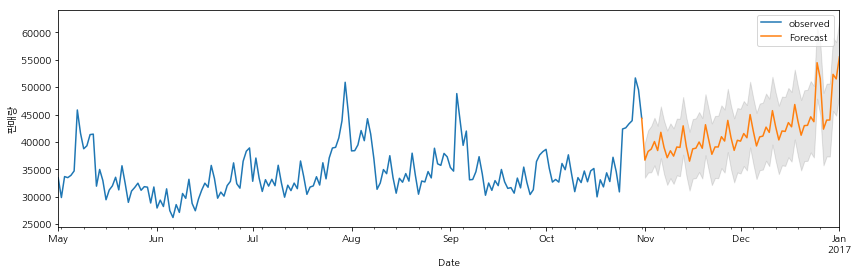

In [259]:
y = df_time['amount']
y_exog = df_time.drop('amount',axis=1)

mod = sm.tsa.statespace.SARIMAX(y,
                                exog=y_exog,
                                order=(7, 1, 6),
                                trend='ct',
                                seasonal_order=(0, 0, 0, 0),
                                freq = 'D',
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
# print(results.summary().tables[1])


# _exog = df_forecast.drop('amount',axis=1)
# _exog = df_new_train.drop('amount',axis=1).append(df_new_test.drop('amount',axis=1))
# _exog = _exog.append(df_forecast.drop('amount',axis=1))
_exog = df_forecast.drop('amount',axis=1)

pred_uc = results.get_forecast(steps=len(_exog),exog=_exog)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 4))

pred = pd.DataFrame(columns=['amount'],index=['2016-10-31'],data=[44300])
_pred = pred['amount'].append(pred_uc.predicted_mean)
_pred.index = pd.to_datetime(_pred.index)
# pred_uc.predicted_mean.plot(ax=ax, label='Forecast')


_pred.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.1)
ax.set_xlabel('Date')
ax.set_ylabel('판매량')

plt.legend()
plt.show()

In [ ]:
import matplotlib.dates as mdates
from matplotlib.dates import MonthLocator, DateFormatter,DayLocator,WeekdayLocator


plt.figure(figsize=(30, 6))
plt.xlabel('date')
plt.ylabel('amount')
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(DayLocator([1,15]))
plt.gca().xaxis.set_minor_locator(DayLocator())
plt.plot(pd.to_datetime(df_raw_time.index),df_raw_time['amount'],label='와인 총 판매액')
plt.legend()


DatetimeIndex(['2016-10-31'], dtype='datetime64[ns]', freq=None)

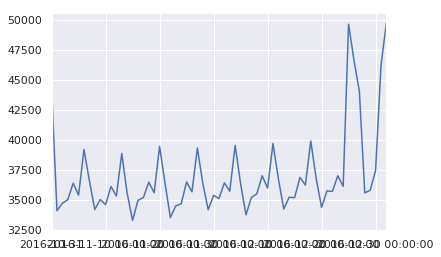

In [330]:
_pred.plot()

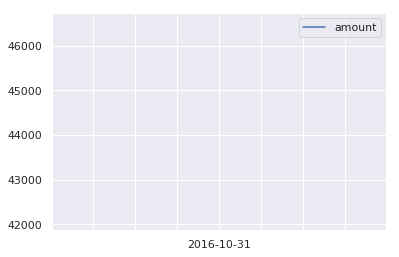

In [318]:
pred_uc.predicted_mean

2016-11-01    34072.506958
2016-11-02    34698.311720
2016-11-03    34996.478191
2016-11-04    36368.058710
2016-11-05    35375.432836
2016-11-06    39178.806653
2016-11-07    36592.964412
2016-11-08    34169.295834
2016-11-09    35003.492459
2016-11-10    34578.526924
2016-11-11    36097.718623
2016-11-12    35303.707876
2016-11-13    38849.290927
2016-11-14    35519.835272
2016-11-15    33263.379335
2016-11-16    34938.941801
2016-11-17    35172.186971
2016-11-18    36455.420449
2016-11-19    35571.437295
2016-11-20    39449.754159
2016-11-21    36396.806206
2016-11-22    33503.599096
2016-11-23    34474.326829
2016-11-24    34651.270018
2016-11-25    36474.735039
2016-11-26    35650.292845
2016-11-27    39312.316276
2016-11-28    36371.531093
2016-11-29    34159.744399
2016-11-30    35349.427166
                  ...     
2016-12-03    35708.083445
2016-12-04    39528.379427
2016-12-05    36341.380144
2016-12-06    33726.146711
2016-12-07    35176.953915
2016-12-08    35481.713805
2

In [189]:
arimax = sm.tsa.statespace.SARIMAX(tra,order=(7,1,7),seasonal_order=(0,0,0,0),exog = exog_train,freq='D',
                                  enforce_stationarity=False, enforce_invertibility=False,).fit()
arimax.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                 amount   No. Observations:                  153
Model:               SARIMAX(7, 1, 7)   Log Likelihood               -1289.858
Date:                Tue, 06 Aug 2019   AIC                           2625.715
Time:                        20:13:18   BIC                           2694.021
Sample:                    05-01-2016   HQIC                          2653.471
                         - 09-30-2016                                         
Covariance Type:                  opg                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
dayofweek-0 -1721.6175   2.24e+04     -0.077      0.939   -4.56e+04    4.22e+04
dayofweek-1   -90.6433   2.25e+04     -0.004      0.997   -4.43e+04    4.41e+04
dayofweek-2  -427.6899   2.25e+04     -0.019      0.985   -4.45e+04    4.37e+04
dayofweek-3   893.5729   2.23e+04      0.040      0.968   -4.28e+04    4.45e+04
dayofweek-4  -395.0853   2.23e+04     -0.018      0.986    -4.4e+04    4.33e+04
dayofweek-5  2531.6111   7449.811      0.340      0.734   -1.21e+04    1.71e+04
dayofweek-6  -790.1474   7488.409     -0.106      0.916   -1.55e+04    1.39e+04
weekend      1741.4637   1.49e+04      0.117      0.907   -2.75e+04     3.1e+04
ar.L1           0.0494      0.114      0.433      0.665      -0.174       0.273
ar.L2          -0.0493      0.109     -0.454      0.650      -0.262       0.163
ar.L3          -0.0391      0.096     -0.406      0.685      -0.228       0.150
ar.L4          -0.0623      0.099     -0.630      0.529      -0.256       0.131
ar.L5          -0.2364      0.094     -2.503      0.012      -0.422      -0.051
ar.L6          -0.1109      0.112     -0.994      0.320      -0.330       0.108
ar.L7           0.4452      0.157      2.827      0.005       0.137       0.754
ma.L1          -0.0860      0.127     -0.678      0.498      -0.334       0.162
ma.L2          -0.1705      0.163     -1.046      0.295      -0.490       0.149
ma.L3          -0.0743      0.122     -0.610      0.542      -0.313       0.164
ma.L4          -0.0894      0.137     -0.650      0.516      -0.359       0.180
ma.L5           0.1627      0.160      1.017      0.309      -0.151       0.476
ma.L6           0.2224      0.113      1.970      0.049       0.001       0.444
ma.L7          -0.8164      0.225     -3.635      0.000      -1.257      -0.376
sigma2       3.683e+06   7.23e+05      5.094      0.000    2.27e+06     5.1e+06
===================================================================================
Ljung-Box (Q):                       34.83   Jarque-Bera (JB):               157.95
Prob(Q):                              0.70   Prob(JB):                         0.00
Heteroskedasticity (H):               1.68   Skew:                             0.62
Prob(H) (two-sided):                  0.07   Kurtosis:                         7.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.53e+19. Standard errors may be unstable.
"""

## 시계열 분석 : 데이터 분할

In [8]:
train_size=0.9
len_idx=len(df_new_time.index)
mask=(np.arange(len_idx)/len_idx)<train_size
print(mask)

df_new_time_train=df_new_time[mask]
df_new_time_test=df_new_time[~mask]
print(df_new_time_train.shape)
print(df_new_time_test.shape)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  T

In [9]:
# df_new_time_train=df_new_time[df_new_time.index<='2016-03-22']
# df_new_time_test=df_new_time[df_new_time.index>'2016-03-22']
# df_new_time_test.head()

In [10]:
df_new_time_train

,amount
date,
2016-05-01,33450
2016-05-02,29850
2016-05-03,33675
2016-05-04,33480
2016-05-05,33900
2016-05-06,34705
2016-05-07,45835
2016-05-08,41585
2016-05-09,38750


In [11]:
df_new_time_train.shift(1)

,amount
date,
2016-05-01,NaN
2016-05-02,33450.0
2016-05-03,29850.0
2016-05-04,33675.0
2016-05-05,33480.0
2016-05-06,33900.0
2016-05-07,34705.0
2016-05-08,45835.0
2016-05-09,41585.0


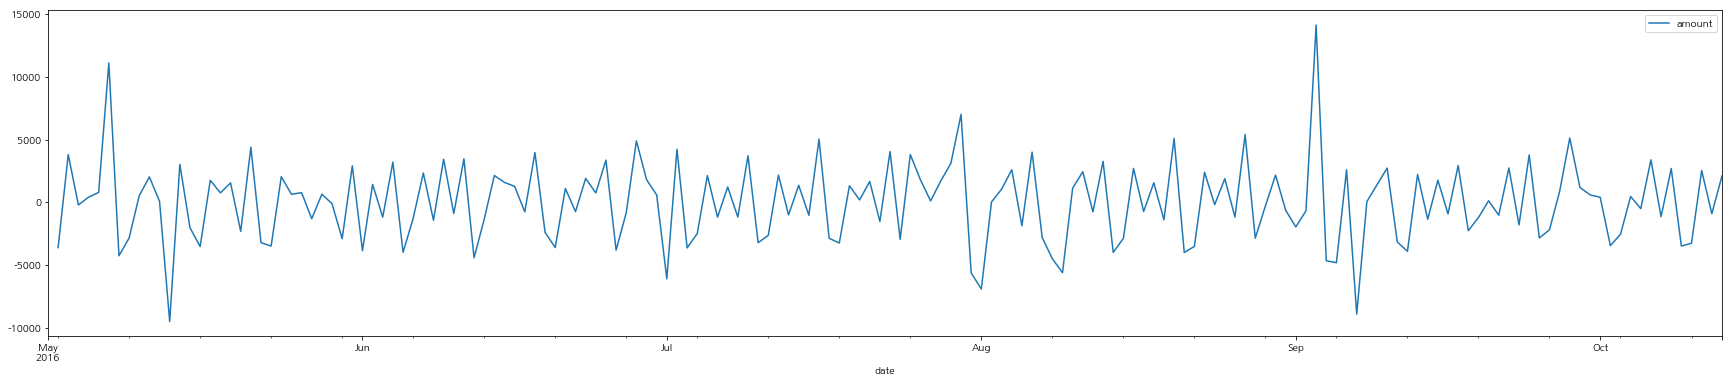

In [12]:
df_new_time_diff1=df_new_time_train-df_new_time_train.shift(1)
df_new_time_diff1.plot(figsize=(30,6))

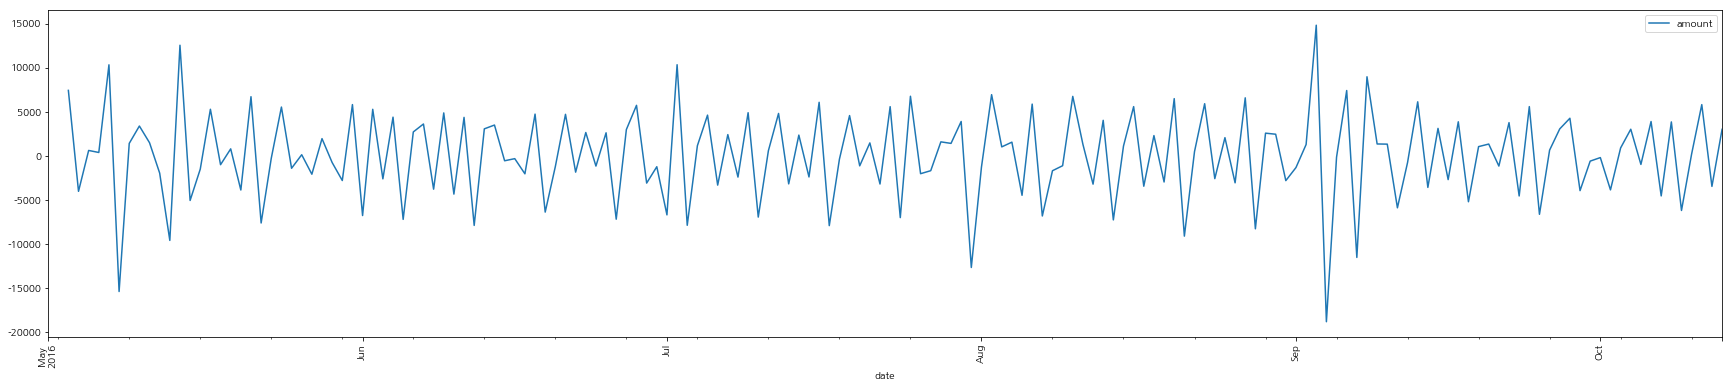

In [13]:
# plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
# plt.gca().xaxis.set_major_locator(DayLocator())

df_new_time_diff2=df_new_time_diff1 - df_new_time_diff1.shift(1)
df_new_time_diff2.plot(figsize=(30,6),rot=90)



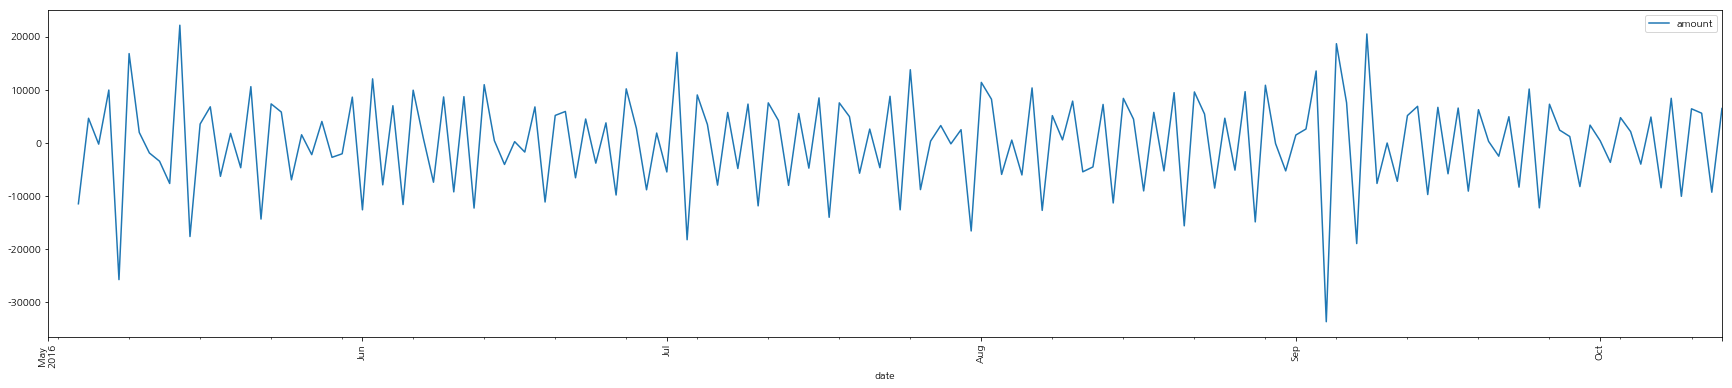

In [14]:
df_new_time_diff3=df_new_time_diff2 - df_new_time_diff2.shift(1)
df_new_time_diff3.plot(figsize=(30,6),rot=90)



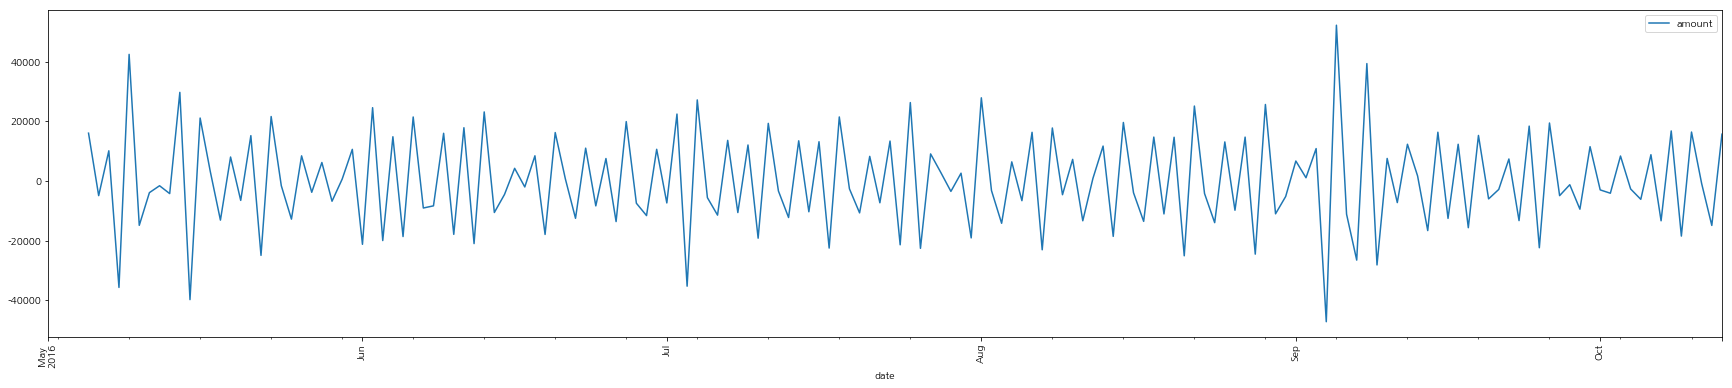

In [15]:
df_new_time_diff4=df_new_time_diff3 - df_new_time_diff3.shift(1)
df_new_time_diff4.plot(figsize=(30,6),rot=90)



In [16]:
df_new_time_test

,amount
date,
2016-10-14,32730
2016-10-15,34715
2016-10-16,35155
2016-10-17,29970
2016-10-18,33085
2016-10-19,31790
2016-10-20,34360
2016-10-21,32770
2016-10-22,37200


## 시계열 분석 : 자기상관 함수

In [17]:
df_new_time_train.head()

,amount
date,
2016-05-01,33450
2016-05-02,29850
2016-05-03,33675
2016-05-04,33480
2016-05-05,33900


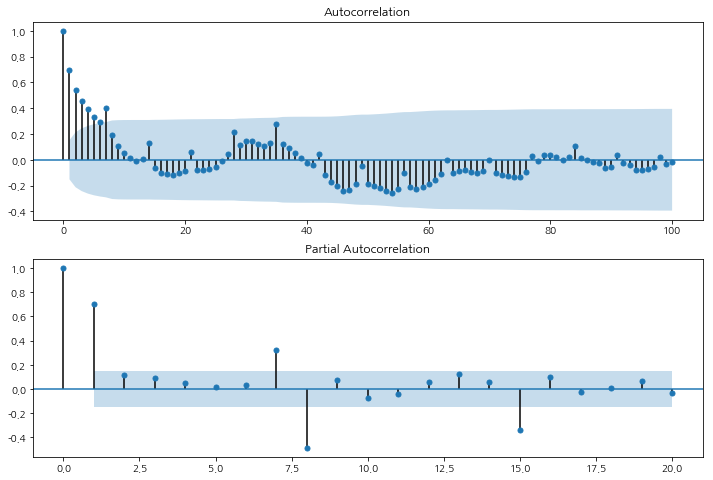

In [18]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

acf_lag=100
pacf_lag=20
fig=plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig=plot_acf(df_new_time_train['amount'],lags=acf_lag,ax=ax1)
ax2=fig.add_subplot(212)
fig=plot_pacf(df_new_time_train['amount'],lags=pacf_lag,ax=ax2)


## 예측 및 결과 해석

In [19]:
df_new_time_test.head()

,amount
date,
2016-10-14,32730
2016-10-15,34715
2016-10-16,35155
2016-10-17,29970
2016-10-18,33085


In [20]:
df_new_time_test.ix[0]

/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


amount    32730
Name: 2016-10-14 00:00:00, dtype: int64

In [21]:
df_new_time_test.index

DatetimeIndex(['2016-10-14', '2016-10-15', '2016-10-16', '2016-10-17',
               '2016-10-18', '2016-10-19', '2016-10-20', '2016-10-21',
               '2016-10-22', '2016-10-23', '2016-10-24', '2016-10-25',
               '2016-10-26', '2016-10-27', '2016-10-28', '2016-10-29',
               '2016-10-30', '2016-10-31'],
              dtype='datetime64[ns]', name='date', freq=None)

/home/pirl/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)
/home/pirl/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)
/home/pirl/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:320: FutureWarning: Creating a Date

                             ARIMA Model Results                              
Dep. Variable:              D2.amount   No. Observations:                  164
Model:                 ARIMA(1, 2, 0)   Log Likelihood               -1603.571
Method:                       css-mle   S.D. of innovations           4263.415
Date:                Mon, 05 Aug 2019   AIC                           3213.143
Time:                        21:55:00   BIC                           3222.443
Sample:                    05-03-2016   HQIC                          3216.918
                         - 10-13-2016                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              12.6092    214.908      0.059      0.953    -408.603     433.821
ar.L1.D2.amount    -0.5525      0.065     -8.469      0.000      -0.680      -0.425
                                

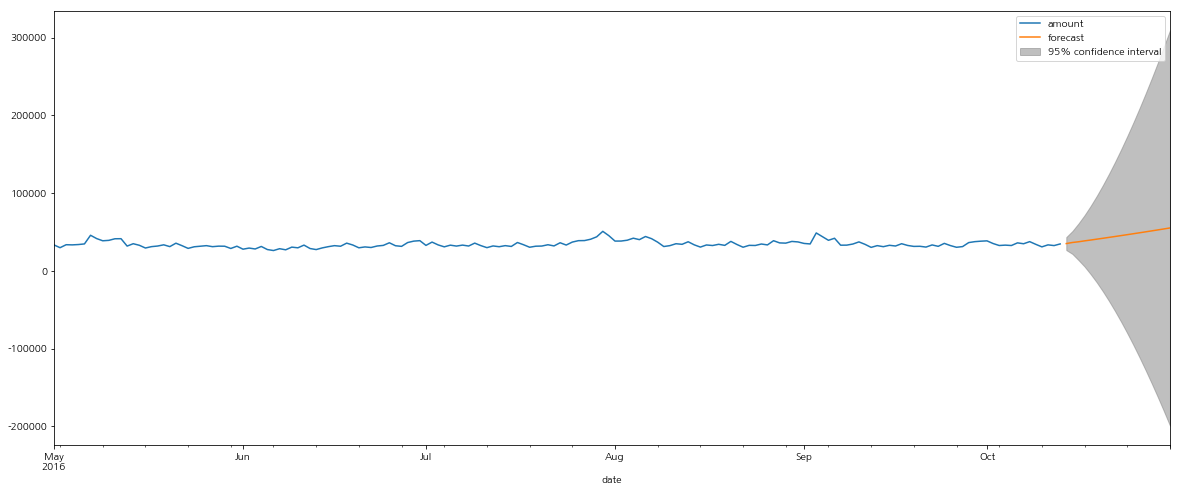

In [22]:
from statsmodels.tsa.arima_model import ARIMA

ts_model=ARIMA(df_new_time_train,order=(1,2,0))
ts_result=ts_model.fit(trend='c',full_output=True)
print(ts_result.summary())

start_time=df_new_time_test.index.min()
end_time=df_new_time_test.index.max()
fig,ax=plt.subplots(figsize=(20,8))
ax=df_new_time_train.plot(ax=ax)
fig=ts_result.plot_predict(start=start_time,end=end_time,ax=ax,plot_insample=False)


# model_fit.forecast(steps=1)


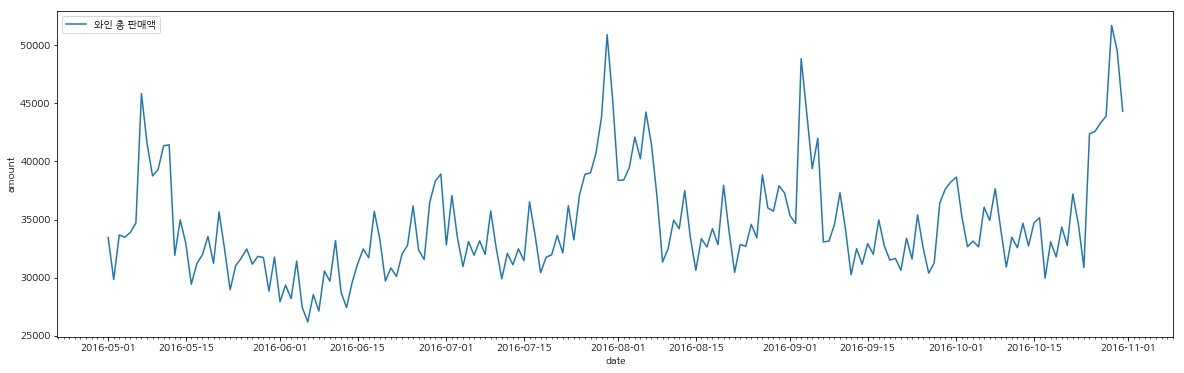

In [23]:
import matplotlib.dates as mdates
from matplotlib.dates import MonthLocator, DateFormatter,DayLocator,WeekdayLocator


plt.figure(figsize=(20, 6))
plt.xlabel('date')
plt.ylabel('amount')
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(DayLocator([1,15]))
plt.gca().xaxis.set_minor_locator(DayLocator())
plt.plot(pd.to_datetime(df_new_time.index),df_new_time['amount'],label='와인 총 판매액')
plt.legend()


In [24]:
df_new_time_train.index

DatetimeIndex(['2016-05-01', '2016-05-02', '2016-05-03', '2016-05-04',
               '2016-05-05', '2016-05-06', '2016-05-07', '2016-05-08',
               '2016-05-09', '2016-05-10',
               ...
               '2016-10-04', '2016-10-05', '2016-10-06', '2016-10-07',
               '2016-10-08', '2016-10-09', '2016-10-10', '2016-10-11',
               '2016-10-12', '2016-10-13'],
              dtype='datetime64[ns]', name='date', length=166, freq=None)

In [25]:
df_new_time_test.index

DatetimeIndex(['2016-10-14', '2016-10-15', '2016-10-16', '2016-10-17',
               '2016-10-18', '2016-10-19', '2016-10-20', '2016-10-21',
               '2016-10-22', '2016-10-23', '2016-10-24', '2016-10-25',
               '2016-10-26', '2016-10-27', '2016-10-28', '2016-10-29',
               '2016-10-30', '2016-10-31'],
              dtype='datetime64[ns]', name='date', freq=None)

In [26]:
df_new_time_test.ix[start_time]

/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


amount    32730
Name: 2016-10-14 00:00:00, dtype: int64

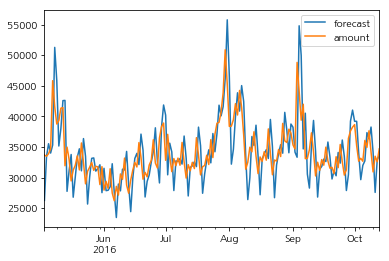

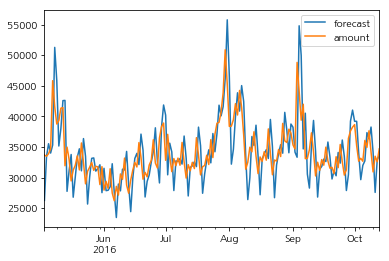

In [27]:
ts_result.plot_predict()

In [28]:
df_new_time

,amount
date,
2016-05-01,33450
2016-05-02,29850
2016-05-03,33675
2016-05-04,33480
2016-05-05,33900
2016-05-06,34705
2016-05-07,45835
2016-05-08,41585
2016-05-09,38750


In [29]:
df_new_time.index.min()

Timestamp('2016-05-01 00:00:00')

In [30]:
y_pred

NameError: name 'y_pred' is not defined

In [52]:
start_time=df_new_time.index.min()
y_pred=ts_result.predict(start=pd.to_datetime('2016-10-14'),end=end_time,typ='levels')
df_new=df_new_time.copy()
df_new['예측값']=y_pred
df_new.head()

,amount,예측값
date,,
2016-05-01,33450,NaN
2016-05-02,29850,NaN
2016-05-03,33675,NaN
2016-05-04,33480,NaN
2016-05-05,33900,NaN


In [ ]:
df_new.plot(y=['amount','예측값'],figsize=(30,7))

In [ ]:
import matplotlib.dates as mdates
from matplotlib.dates import MonthLocator, DateFormatter,DayLocator,WeekdayLocator


plt.figure(figsize=(30, 6))
plt.xlabel('date')
plt.ylabel('amount')
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(DayLocator([1,15]))
plt.gca().xaxis.set_minor_locator(DayLocator())
plt.plot(pd.to_datetime(df_new_time.index),df_new_time['amount'],label='와인 총 판매액')
plt.legend()
d

In [ ]:
df_sales.head()

# arimax

In [53]:
df_raw_sales=pd.read_csv('/home/pirl/Downloads/wine_data_sales.csv',engine='python',encoding='euc-kr',parse_dates=['date'])
df_raw_sales.head()


,Unnamed: 0,date,gender,age,job,marital,province,city,purchase,amount
0,0,2016-05-01,FEMALE,30대,임시직,SINGLE,충청도,청주시,"['D', 'F', 'D', 'G']",100
1,1,2016-05-01,FEMALE,30대,변호사,MARREID,서울시,양천구,"['C', 'G', 'E']",60
2,2,2016-05-01,MALE,60대 이상,회사직원,SINGLE,부산시,연제구,"['B', 'F']",30
3,3,2016-05-01,FEMALE,40대,중소기업직원,MARREID,서울시,양천구,['C'],15
4,4,2016-05-01,FEMALE,50대,의사,MARREID,경상도,거제시,"['G', 'A', 'B']",75


In [54]:
df_sales = df_raw_sales.drop('Unnamed: 0',axis=1)

## 변동 추세 확인

In [55]:
df_new_time=df_sales.groupby(['date']).agg(np.sum)

In [56]:
df_new_time.head()

,amount
date,
2016-05-01,33450
2016-05-02,29850
2016-05-03,33675
2016-05-04,33480
2016-05-05,33900


In [57]:
df_new_time.index

DatetimeIndex(['2016-05-01', '2016-05-02', '2016-05-03', '2016-05-04',
               '2016-05-05', '2016-05-06', '2016-05-07', '2016-05-08',
               '2016-05-09', '2016-05-10',
               ...
               '2016-10-22', '2016-10-23', '2016-10-24', '2016-10-25',
               '2016-10-26', '2016-10-27', '2016-10-28', '2016-10-29',
               '2016-10-30', '2016-10-31'],
              dtype='datetime64[ns]', name='date', length=184, freq=None)

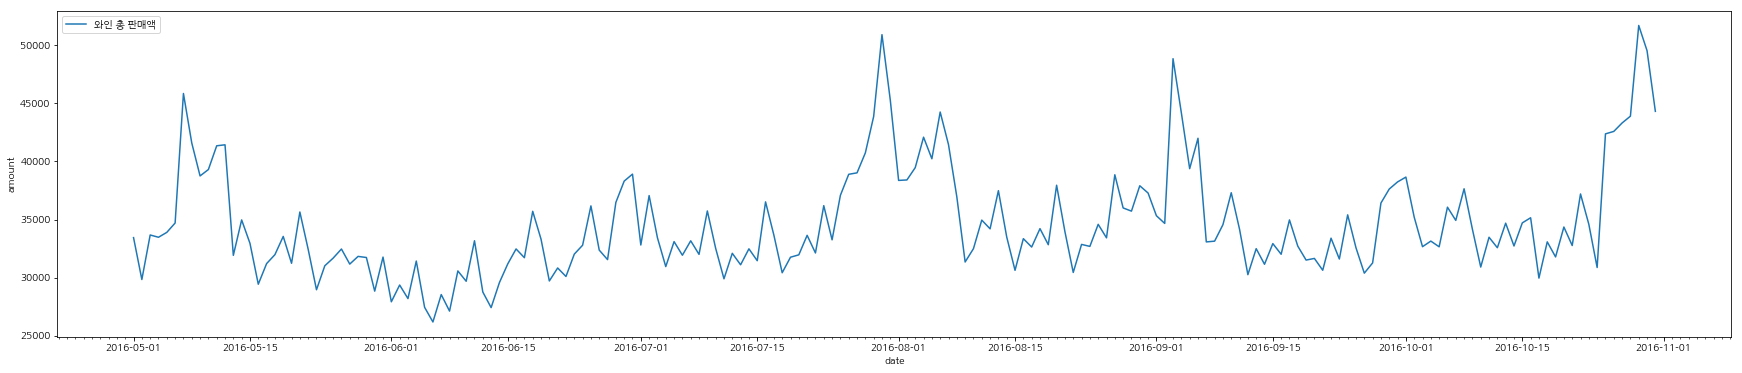

In [58]:
import matplotlib.dates as mdates
from matplotlib.dates import MonthLocator, DateFormatter,DayLocator,WeekdayLocator


plt.figure(figsize=(30, 6))
plt.xlabel('date')
plt.ylabel('amount')
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(DayLocator([1,15]))
plt.gca().xaxis.set_minor_locator(DayLocator())
plt.plot(pd.to_datetime(df_new_time.index),df_new_time['amount'],label='와인 총 판매액')
plt.legend()


In [59]:
df_new['amount'][df_new['amount']>38000].index

DatetimeIndex(['2016-05-07', '2016-05-08', '2016-05-09', '2016-05-10',
               '2016-05-11', '2016-05-12', '2016-06-29', '2016-06-30',
               '2016-07-26', '2016-07-27', '2016-07-28', '2016-07-29',
               '2016-07-30', '2016-07-31', '2016-08-01', '2016-08-02',
               '2016-08-03', '2016-08-04', '2016-08-05', '2016-08-06',
               '2016-08-07', '2016-08-27', '2016-09-03', '2016-09-04',
               '2016-09-05', '2016-09-06', '2016-09-30', '2016-10-01',
               '2016-10-25', '2016-10-26', '2016-10-27', '2016-10-28',
               '2016-10-29', '2016-10-30', '2016-10-31'],
              dtype='datetime64[ns]', name='date', freq=None)

## 더미 변수 생성

In [60]:
df_new = df_new_time.copy()

#month one hot encoding
df_new['month'] = df_new.index.month
month_dummies = pd.get_dummies(df_new['month'])
month_dummies.columns = ['month-'+ str(m) for m in range(5,11)]
df_new = pd.concat([df_new, month_dummies], axis=1, join_axes=[df_new.index]).drop(['month'],axis=1)

#dayofweek one hot encoding
df_new['weekday'] = df_new.index.weekday
week_dummies = pd.get_dummies(df_new['weekday'])
week_dummies.columns = ['weekday-'+ str(w) for w in range(0,7)]
df_new = pd.concat([df_new, week_dummies], axis=1, join_axes=[df_new.index]).drop(['weekday'],axis=1)

#Satday,Sunday
df_new['weekend'] = (df_new.index.weekday>4).astype(int)

#quarter
df_new['quarter'] = df_new.index.month
df_new['quarter'][df_new['quarter']==1]='1Q'
df_new['quarter'][df_new['quarter']==2]='1Q'
df_new['quarter'][df_new['quarter']==3]='1Q'
df_new['quarter'][df_new['quarter']==4]='2Q'
df_new['quarter'][df_new['quarter']==5]='2Q'
df_new['quarter'][df_new['quarter']==6]='2Q'
df_new['quarter'][df_new['quarter']==7]='3Q'
df_new['quarter'][df_new['quarter']==8]='3Q'
df_new['quarter'][df_new['quarter']==9]='3Q'
df_new['quarter'][df_new['quarter']==10]='4Q'
df_new['quarter'][df_new['quarter']==11]='4Q'
df_new['quarter'][df_new['quarter']==12]='4Q'
quarter_dummies = pd.get_dummies(df_new['quarter'])
df_new = pd.concat([df_new, quarter_dummies], axis=1, join_axes=[df_new.index]).drop(['quarter'],axis=1)


/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a 

In [61]:
# df_new = df_new_time.copy()

# #month one hot encoding
# df_new['month'] = df_new.index.month
# month_dummies = pd.get_dummies(df_new['month'])
# month_dummies.columns = ['month-'+ str(m) for m in range(5,11)]
# df_new['month-1']=0
# df_new['month-2']=0
# df_new['month-3']=0
# df_new['month-4']=0
# df_new = pd.concat([df_new, month_dummies], axis=1, join_axes=[df_new.index]).drop(['month'],axis=1)
# df_new['month-11']=0
# df_new['month-12']=0

# #dayofweek one hot encoding
# df_new['weekday'] = df_new.index.weekday
# week_dummies = pd.get_dummies(df_new['weekday'])
# week_dummies.columns = ['weekday-'+ str(w) for w in range(0,7)]
# df_new = pd.concat([df_new, week_dummies], axis=1, join_axes=[df_new.index]).drop(['weekday'],axis=1)

# #Satday,Sunday
# df_new['weekend'] = (df_new.index.weekday>4).astype(int)

# #quarter
# df_new['quarter'] = df_new.index.month
# df_new['quarter'][df_new['quarter']==1]='1Q'
# df_new['quarter'][df_new['quarter']==2]='1Q'
# df_new['quarter'][df_new['quarter']==3]='1Q'
# df_new['quarter'][df_new['quarter']==4]='2Q'
# df_new['quarter'][df_new['quarter']==5]='2Q'
# df_new['quarter'][df_new['quarter']==6]='2Q'
# df_new['quarter'][df_new['quarter']==7]='3Q'
# df_new['quarter'][df_new['quarter']==8]='3Q'
# df_new['quarter'][df_new['quarter']==9]='3Q'
# df_new['quarter'][df_new['quarter']==10]='4Q'
# df_new['quarter'][df_new['quarter']==11]='4Q'
# df_new['quarter'][df_new['quarter']==12]='4Q'
# quarter_dummies = pd.get_dummies(df_new['quarter'])
# df_new['1Q']=0
# df_new = pd.concat([df_new, quarter_dummies], axis=1, join_axes=[df_new.index]).drop(['quarter'],axis=1)


In [62]:

# #holiday
# holiday=['2016-01-01', # 1월 신정 연휴
#         '2016-01-02', # 1월 신정 연휴
#         '2016-01-03', # 1월 신정 연휴
#         '2016-02-06', # 2월 설날 연휴
#         '2016-02-07', # 2월 설날 연휴
#         '2016-02-08', # 2월 설날 연휴
#         '2016-02-09', # 2월 설날 연휴
#         '2016-02-10', # 2월 설날 연휴
#         '2016-03-01', # 3월 3.1절
#         '2016-04-13', # 4월 국회의원 선거일
#         '2016-05-05', # 5월 어린이날
#         '2016-05-14', # 5월 석가탄신일
#         '2016-06-06', # 6월 현충일
#         '2016-08-15', # 8월 광복절
#         '2016-09-14', # 9월 추석 연휴
#         '2016-09-15', # 9월 추석 연휴
#         '2016-09-16', # 9월 추석 연휴
#         '2016-09-17', # 9월 추석 연휴
#         '2016-09-18', # 9월 추석 연휴
#         '2016-10-01', # 10월 개천절 연휴
#         '2016-10-02', # 10월 개천절 연휴
#         '2016-10-03', # 10월 개천절 연휴
#         '2016-12-25'] # 12월 크리스마스
# df_new['holiday'] = (df_new.index.isin(holiday)).astype(int)

#querter_end
querter_end = ['2016-03-30', '2016-03-31', # 1분기 말
               '2016-06-29', '2016-06-30', # 2분기 말
               '2016-09-29', '2016-09-30', # 3분기 말
               '2016-12-30', '2016-12-31'] # 4분기 말
df_new['querter_end'] = (df_new.index.isin(querter_end)).astype(int)


# #holiday
# special_event=['2016-05-07', '2016-05-08', # 5월 어버이날 스승의날
#                '2016-05-09', '2016-05-10', # 5월 어버이날 스승의날
#                '2016-05-11', '2016-05-12', # 5월 어버이날 스승의날
#                '2016-07-26', '2016-07-27', '2016-07-28', '2016-07-29', # 여름휴가
#                '2016-07-30', '2016-07-31', '2016-08-01', '2016-08-02', # 여름휴가
#                '2016-08-03', '2016-08-04', '2016-08-05', '2016-08-06', '2016-08-07', # 여름휴가
#                '2016-09-03', '2016-09-04', '2016-09-05', '2016-09-06', # 9월 추석 배송마감
#                '2016-10-25', '2016-10-26', '2016-10-27', '2016-10-28', # 코리안 세일 페스타
#                '2016-10-29', '2016-10-30', '2016-10-31'] # 코리안 세일 페스타
# df_new['special_event'] = (df_new.index.isin(special_event)).astype(int)



In [63]:
df_new.columns

Index(['amount', 'month-5', 'month-6', 'month-7', 'month-8', 'month-9',
       'month-10', 'weekday-0', 'weekday-1', 'weekday-2', 'weekday-3',
       'weekday-4', 'weekday-5', 'weekday-6', 'weekend', '2Q', '3Q', '4Q',
       'querter_end'],
      dtype='object')

## train size

In [64]:
train_size=0.9
len_idx=len(df_new.index)
mask=(np.arange(len_idx)/len_idx)<train_size
print(mask)

df_new_train=df_new[mask]
df_new_test=df_new[~mask]
print(df_new_train.shape)
print(df_new_test.shape)#dayofweek one hot encoding
# df_new['weekday'] = df_new.index.weekday
# week_dummies = pd.get_dummies(df_new['weekday'])
# week_dummies.columns = ['weekday-'+ str(w) for w in range(0,7)]
# df_new = pd.concat([df_new, week_dummies], axis=1, join_axes=[df_new.index]).drop(['weekday'],axis=1)


train_start=df_new_train.index.min()
train_end=df_new_train.index.max()
test_start=df_new_test.index.min()
test_end=df_new_test.index.max()

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  T

## arimax 모델 생성

/home/pirl/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)
/home/pirl/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


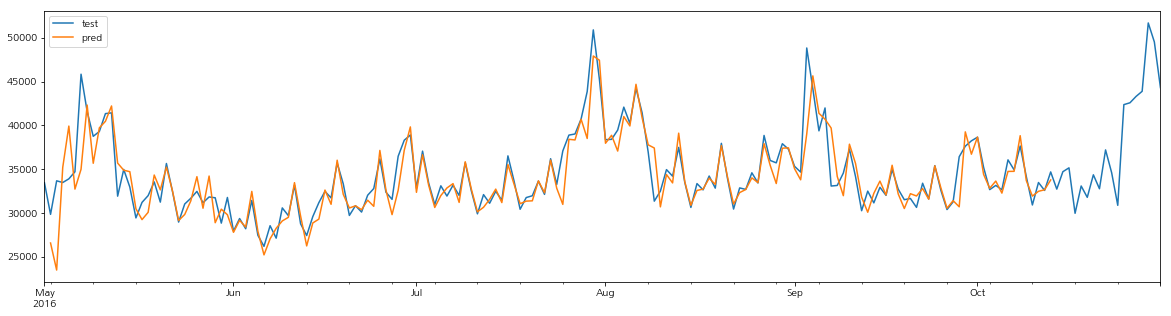

In [65]:
from sklearn.metrics import mean_squared_error

arimax = sm.tsa.statespace.SARIMAX(df_new_train['amount'],
                               order=(7,1,7),
                               seasonal_order=(0,0,0,0),
                               #trend='n', # str{'n','c','t','ct'} or iterable, optional
                               exog = df_new_train.drop(['amount'],axis = 1),
                               freq='D',
                               enforce_stationarity=False,
                               enforce_invertibility=False).fit()

pred = arimax.predict(exog = df_new_test.drop(['amount'],axis = 1))[1:]
arimax.summary()
#We can use SARIMAX model as ARIMAX when seasonal_order is (0,0,0,0) .

pd.DataFrame({'test':df_new['amount'],'pred':pred}).plot(figsize=(20,5))
plt.show()

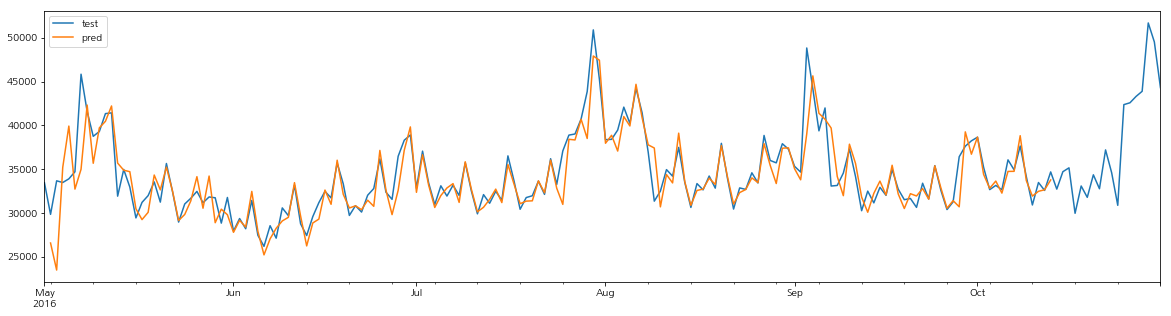

In [66]:
pd.DataFrame({'test':df_new['amount'],'pred':pred}).plot(figsize=(20,5))
plt.show()

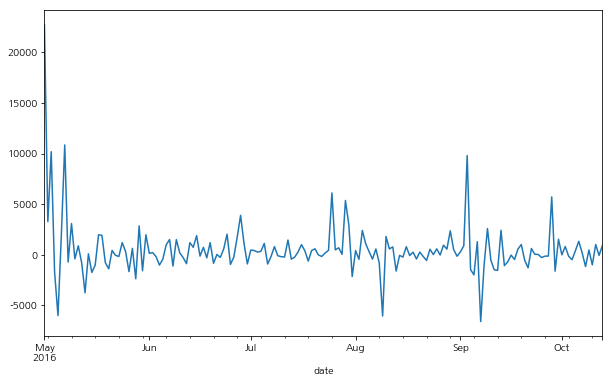

In [67]:
arimax.resid.plot(figsize=(10,6))
plt.show()

## 그래프 그리기

### 예측 데이터 프레임 생성

In [68]:
df_forecast = pd.DataFrame(index=pd.date_range("2016-11-01", "2016-11-07"))
df_forecast['amount'] = 0

In [69]:
# #month one hot encoding
# df_forecast['month'] = df_forecast.index.month
# month_dummies = pd.get_dummies(df_forecast['month'])
# month_dummies.columns = ['month-'+ str(m) for m in range(1,13)]
# df_forecast = pd.concat([df_forecast, month_dummies], axis=1, join_axes=[df_forecast.index]).drop(['month'],axis=1)

#dayofweek one hot encoding
df_forecast['weekday'] = df_forecast.index.weekday
week_dummies = pd.get_dummies(df_forecast['weekday'])
week_dummies.columns = ['weekday-'+ str(w) for w in range(0,7)]
df_forecast = pd.concat([df_forecast, week_dummies], axis=1, join_axes=[df_forecast.index]).drop(['weekday'],axis=1)

# #Satday,Sunday
# df_forecast['weekend'] = (df_forecast.index.weekday>4).astype(int)

# #quarter
# df_forecast['quarter'] = df_forecast.index.month
# df_forecast['quarter'][df_forecast['quarter']==1]='1Q'
# df_forecast['quarter'][df_forecast['quarter']==2]='1Q'
# df_forecast['quarter'][df_forecast['quarter']==3]='1Q'
# df_forecast['quarter'][df_forecast['quarter']==4]='2Q'
# df_forecast['quarter'][df_forecast['quarter']==5]='2Q'
# df_forecast['quarter'][df_forecast['quarter']==6]='2Q'
# df_forecast['quarter'][df_forecast['quarter']==7]='3Q'
# df_forecast['quarter'][df_forecast['quarter']==8]='3Q'
# df_forecast['quarter'][df_forecast['quarter']==9]='3Q'
# df_forecast['quarter'][df_forecast['quarter']==10]='4Q'
# df_forecast['quarter'][df_forecast['quarter']==11]='4Q'
# df_forecast['quarter'][df_forecast['quarter']==12]='4Q'
# quarter_dummies = pd.get_dummies(df_forecast['quarter'])
# df_forecast = pd.concat([df_forecast, quarter_dummies], axis=1, join_axes=[df_forecast.index]).drop(['quarter'],axis=1)


In [70]:
week_dummies

,weekday-0,weekday-1,weekday-2,weekday-3,weekday-4,weekday-5,weekday-6
2016-11-01,0,1,0,0,0,0,0
2016-11-02,0,0,1,0,0,0,0
2016-11-03,0,0,0,1,0,0,0
2016-11-04,0,0,0,0,1,0,0
2016-11-05,0,0,0,0,0,1,0
2016-11-06,0,0,0,0,0,0,1
2016-11-07,1,0,0,0,0,0,0


In [71]:

# #holiday
# holiday=['2016-01-01', # 1월 신정 연휴
#         '2016-01-02', # 1월 신정 연휴
#         '2016-01-03', # 1월 신정 연휴
#         '2016-02-06', # 2월 설날 연휴
#         '2016-02-07', # 2월 설날 연휴
#         '2016-02-08', # 2월 설날 연휴
#         '2016-02-09', # 2월 설날 연휴
#         '2016-02-10', # 2월 설날 연휴
#         '2016-03-01', # 3월 3.1절
#         '2016-04-13', # 4월 국회의원 선거일
#         '2016-05-05', # 5월 어린이날
#         '2016-05-14', # 5월 석가탄신일
#         '2016-06-06', # 6월 현충일
#         '2016-08-15', # 8월 광복절
#         '2016-09-14', # 9월 추석 연휴
#         '2016-09-15', # 9월 추석 연휴
#         '2016-09-16', # 9월 추석 연휴
#         '2016-09-17', # 9월 추석 연휴
#         '2016-09-18', # 9월 추석 연휴
#         '2016-10-01', # 10월 개천절 연휴
#         '2016-10-02', # 10월 개천절 연휴
#         '2016-10-03', # 10월 개천절 연휴
#         '2016-12-25'] # 12월 크리스마스
# df_forecast['holiday'] = (df_forecast.index.isin(holiday)).astype(int)

# #querter_end
# querter_end = ['2016-03-30', '2016-03-31', # 1분기 말
#                '2016-06-29', '2016-06-30', # 2분기 말
#                '2016-09-29', '2016-09-30', # 3분기 말
#                '2016-12-30', '2016-12-31'] # 4분기 말
# df_forecast['querter_end'] = (df_forecast.index.isin(querter_end)).astype(int)


# #holiday
# special_event=['2016-05-07', '2016-05-08', # 5월 어버이날 스승의날
#                '2016-05-09', '2016-05-10', # 5월 어버이날 스승의날
#                '2016-05-11', '2016-05-12', # 5월 어버이날 스승의날
#                '2016-07-26', '2016-07-27', '2016-07-28', '2016-07-29', # 여름휴가
#                '2016-07-30', '2016-07-31', '2016-08-01', '2016-08-02', # 여름휴가
#                '2016-08-03', '2016-08-04', '2016-08-05', '2016-08-06', '2016-08-07', # 여름휴가
#                '2016-09-03', '2016-09-04', '2016-09-05', '2016-09-06', # 9월 추석 배송마감
#                '2016-10-25', '2016-10-26', '2016-10-27', '2016-10-28', # 코리안 세일 페스타
#                '2016-10-29', '2016-10-30', '2016-10-31'] # 코리안 세일 페스타
# df_forecast['special_event'] = (df_forecast.index.isin(special_event)).astype(int)



In [72]:
df_forecast.dtypes

amount       int64
weekday-0    uint8
weekday-1    uint8
weekday-2    uint8
weekday-3    uint8
weekday-4    uint8
weekday-5    uint8
weekday-6    uint8
dtype: object

In [73]:
df_forecast.head()

,amount,weekday-0,weekday-1,weekday-2,weekday-3,weekday-4,weekday-5,weekday-6
2016-11-01,0,0,1,0,0,0,0,0
2016-11-02,0,0,0,1,0,0,0,0
2016-11-03,0,0,0,0,1,0,0,0
2016-11-04,0,0,0,0,0,1,0,0
2016-11-05,0,0,0,0,0,0,1,0


### 1

In [74]:
mod = sm.tsa.statespace.SARIMAX(df_new_train['amount'],
                               order=(2,1,6),
                               seasonal_order=(0,0,0,0),
                               #trend='ct', # str{'n','c','t','ct'} or iterable, optional
                               exog = df_new_train.drop(['amount'],axis = 1),
                               enforce_stationarity=False,
                               enforce_invertibility=False)
fit_res = mod.fit(disp=False)
res = mod.filter(fit_res.params)

# In-sample one-step-ahead predictions
predict = res.get_prediction()
predict_ci = predict.conf_int()

# Dynamic predictions
predict_dy = res.get_prediction(dynamic='2016-10-01')
predict_dy_ci = predict_dy.conf_int()

/home/pirl/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


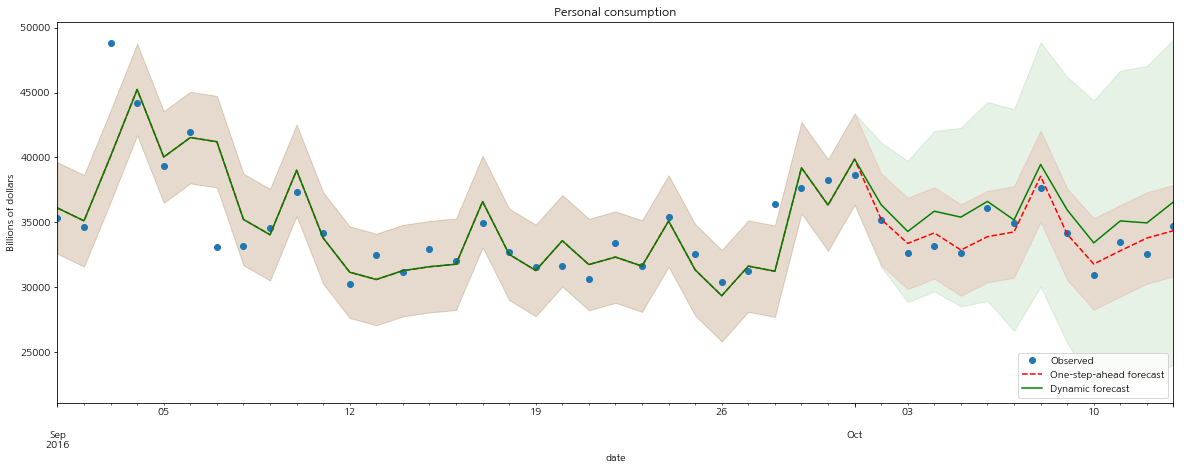

In [75]:
# Graph
fig, ax = plt.subplots(figsize=(20,7))
npre = 4
ax.set(title='Personal consumption', xlabel='Date', ylabel='Billions of dollars')

# Plot data points
df_new_train.loc['2016-09-01':, 'amount'].plot(ax=ax, style='o', label='Observed')

# Plot predictions
predict.predicted_mean.loc['2016-09-01':].plot(ax=ax, style='r--', label='One-step-ahead forecast')
ci = predict_ci.loc['2016-09-01':]
ax.fill_between(ci.index, ci.iloc[:,0], ci.iloc[:,1], color='r', alpha=0.1)

predict_dy.predicted_mean.loc['2016-09-01':].plot(ax=ax, style='g', label='Dynamic forecast')
ci = predict_dy_ci.loc['2016-09-01':]
ax.fill_between(ci.index, ci.iloc[:,0], ci.iloc[:,1], color='g', alpha=0.1)

legend = ax.legend(loc='lower right')

AttributeError: 'NotImplementedType' object has no attribute 'reindex_like'

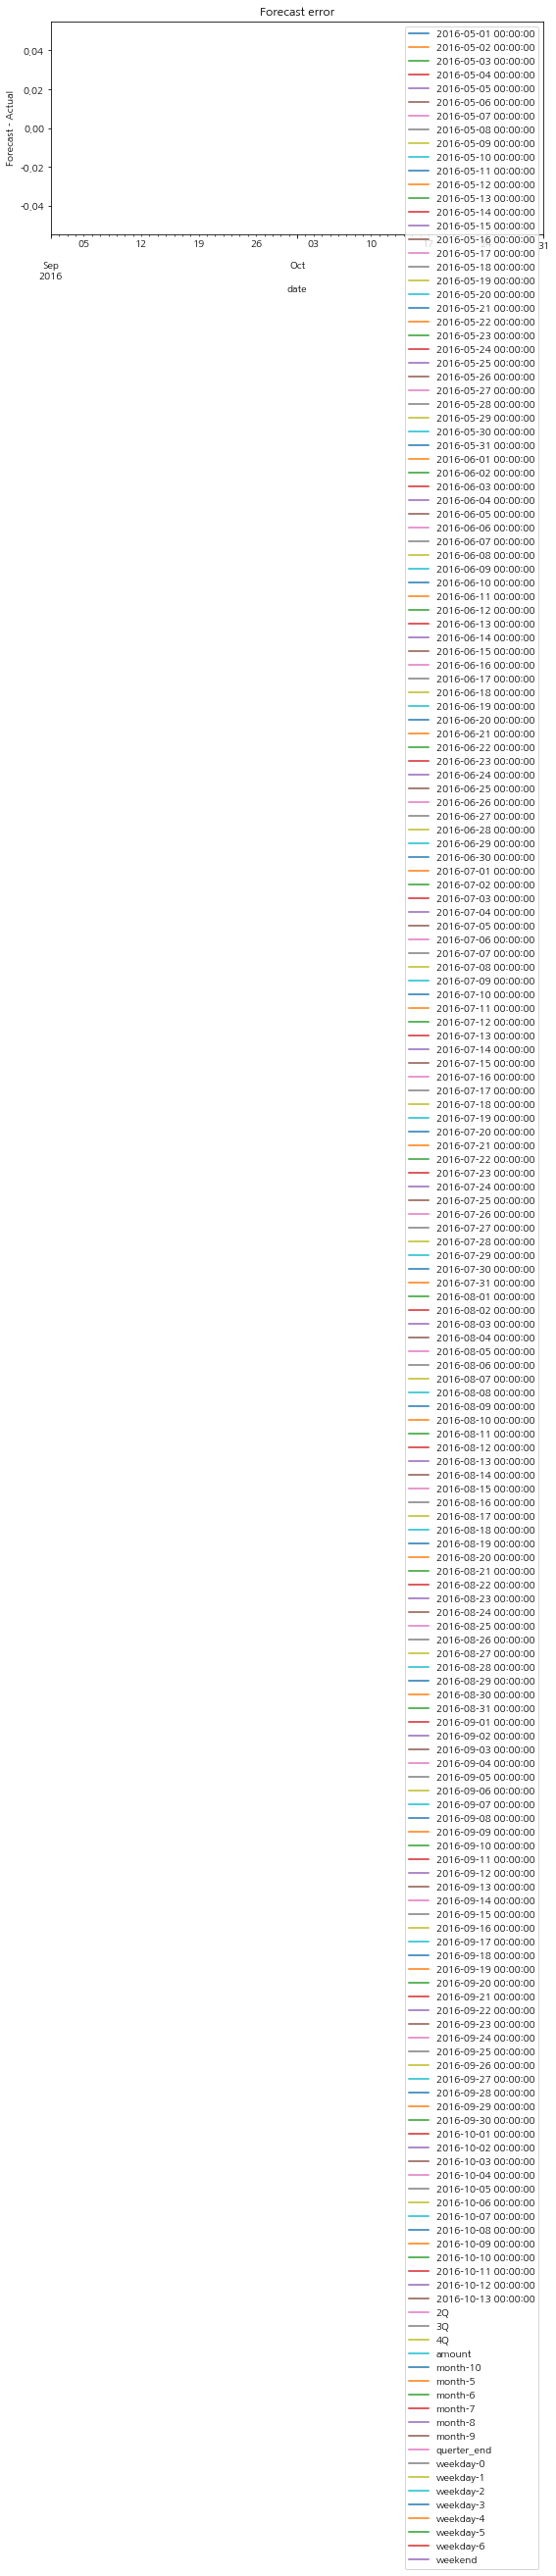

In [76]:
# Prediction error

# Graph
fig, ax = plt.subplots(figsize=(9,4))
npre = 4
ax.set(title='Forecast error', xlabel='Date', ylabel='Forecast - Actual')

# In-sample one-step-ahead predictions and 95% confidence intervals
predict_error = predict.predicted_mean - df_new
predict_error.loc['2016-09-01':].plot(ax=ax, label='One-step-ahead forecast')
ci = predict_ci.loc['2016-09-01':].copy()
ci.iloc[:,0] -= df_new.loc['2016-09-01':]
ci.iloc[:,1] -= df_new.loc['2016-09-01':]
ax.fill_between(ci.index, ci.iloc[:,0], ci.iloc[:,1], alpha=0.1)

# Dynamic predictions and 95% confidence intervals
predict_dy_error = predict_dy.predicted_mean - endog
predict_dy_error.loc['2016-09-01':].plot(ax=ax, style='r', label='Dynamic forecast (1978)')
ci = predict_dy_ci.loc['2016-09-01':].copy()
ci.iloc[:,0] -= df_new.loc['2016-09-01':]
ci.iloc[:,1] -= df_new.loc['2016-09-01':]
ax.fill_between(ci.index, ci.iloc[:,0], ci.iloc[:,1], color='r', alpha=0.1)

legend = ax.legend(loc='lower left');
legend.get_frame().set_facecolor('w')

In [ ]:
yhat = arimax.forecast(5)

predicted = arimax.forecast(steps=5, exog=np.array(df_new_train['amount']).reshape(-1,1))[0]


### 2

In [ ]:
arimax = sm.tsa.statespace.SARIMAX(df_new_train[['amount']],
                               order=(7,1,7),
                               seasonal_order=(0,0,0,0),
                               #trend='n', # str{'n','c','t','ct'} or iterable, optional
                               exog = df_new_train.drop(['amount'],axis = 1),
                               freq='D',
                               enforce_stationarity=False,
                               enforce_invertibility=False).fit()

# pred = arimax.predict(exog = df_new_test.drop(['amount'],axis = 1))[1:]
# arimax.summary()
# #We can use SARIMAX model as ARIMAX when seasonal_order is (0,0,0,0) .

# pd.DataFrame({'test':df_new['amount'],'pred':pred}).plot(figsize=(20,5))
# plt.show()

In [ ]:
plt.figure()
pred = arimax.get_prediction(start=train_start, dynamic=False)
pred_ci = pred.conf_int()
ax = df_new_train.loc[train_start:,'amount'].plot(alpha=0.7)
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=0.7, figsize=(14, 4))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='purple', alpha=.1)
ax.set_xlabel('Date')
ax.set_ylabel('매출')
plt.legend(loc='upper right')
plt.show()

In [ ]:
y_forecasted = pred.predicted_mean
y_truth = df_new.loc[train_start:,'amount']
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error is {}'.format(round(np.sqrt(mse), 2)))

In [ ]:


pred_uc = arimax.get_forecast(steps=40, exog = df_new_test.drop(['amount'],axis = 1))
pred_ci = pred_uc.conf_int()
ax = df_new.loc[train_start:,'amount'].plot(label='observed', figsize=(14, 4))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.legend()
plt.show()




In [ ]:
pred_uc[0]

### 3

In [77]:
df_new.head()

,amount,month-5,month-6,month-7,month-8,month-9,month-10,weekday-0,weekday-1,weekday-2,weekday-3,weekday-4,weekday-5,weekday-6,weekend,2Q,3Q,4Q,querter_end
date,,,,,,,,,,,,,,,,,,,
2016-05-01,33450,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0
2016-05-02,29850,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
2016-05-03,33675,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
2016-05-04,33480,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
2016-05-05,33900,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0


In [78]:
y=df_new['amount']

In [79]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(2, 2, 2),
                                # seasonal_order=(2, 2, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1798      0.058    -20.291      0.000      -1.294      -1.066
ar.L2         -0.3360      0.059     -5.652      0.000      -0.453      -0.219
ma.L1          0.1695      0.038      4.437      0.000       0.095       0.244
ma.L2         -0.7530      0.034    -22.161      0.000      -0.820      -0.686
sigma2      1.039e+07    3.9e-10   2.67e+16      0.000    1.04e+07    1.04e+07


/home/pirl/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


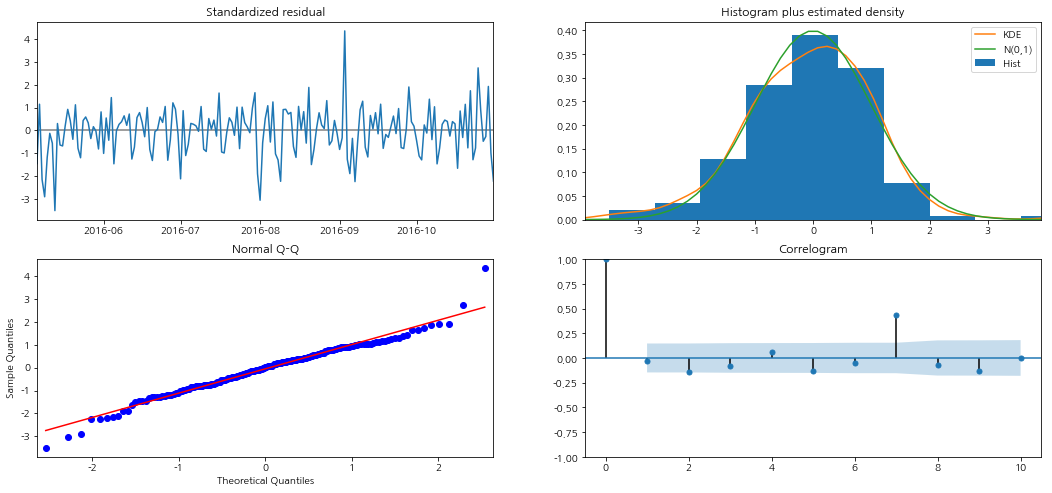

In [80]:
results.plot_diagnostics(figsize=(18, 8))
plt.show()

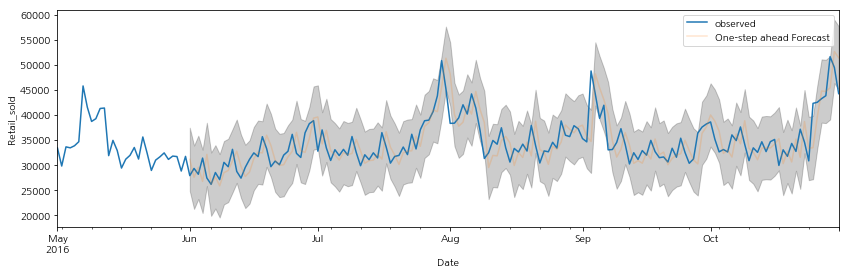

In [81]:
pred = results.get_prediction(start=pd.to_datetime('2016-06-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y[:].plot(label='observed')

pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.2, figsize=(14, 4))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Retail_sold')

plt.legend()
plt.show()

In [82]:
y_forecasted = pred.predicted_mean
y_truth = y[:]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error is 11188256.91
The Root Mean Squared Error is 3344.89


/home/pirl/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:320: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


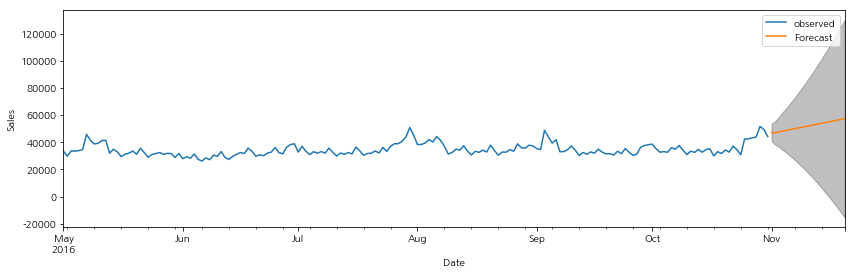

In [83]:
pred_uc = results.get_forecast(steps=20)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 4))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.legend()
plt.show()

In [84]:
y_forecasted = pred.predicted_mean
y_forecasted.head(12)

2016-06-01    31177.249503
2016-06-02    27607.558454
2016-06-03    29588.861992
2016-06-04    26785.941708
2016-06-05    32170.643487
2016-06-06    26221.117350
2016-06-07    27693.047960
2016-06-08    25893.367005
2016-06-09    28514.758427
2016-06-10    28972.540250
2016-06-11    30858.635942
2016-06-12    32810.746647
Freq: D, dtype: float64

In [85]:
pred_ci.head(24)

,lower amount,upper amount
2016-11-01,40908.949002,53542.563152
2016-11-02,38072.579194,55847.820076
2016-11-03,36511.236531,58937.318443
2016-11-04,34092.323905,62599.569210
2016-11-05,31975.851921,65603.443613
2016-11-06,29534.709207,69447.629608
2016-11-07,27073.495628,72823.133477
2016-11-08,24449.134904,76765.150131
2016-11-09,21721.717375,80498.563472
2016-11-10,18876.038673,84582.395638


In [86]:
forecast = pred_uc.predicted_mean
forecast.head(12)

2016-11-01    47225.756077
2016-11-02    46960.199635
2016-11-03    47724.277487
2016-11-04    48345.946557
2016-11-05    48789.647767
2016-11-06    49491.169407
2016-11-07    49948.314552
2016-11-08    50607.142518
2016-11-09    51110.140423
2016-11-10    51729.217156
2016-11-11    52263.706144
2016-11-12    52858.986905
Freq: D, dtype: float64

### 4

In [87]:
df_new.head()

,amount,month-5,month-6,month-7,month-8,month-9,month-10,weekday-0,weekday-1,weekday-2,weekday-3,weekday-4,weekday-5,weekday-6,weekend,2Q,3Q,4Q,querter_end
date,,,,,,,,,,,,,,,,,,,
2016-05-01,33450,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0
2016-05-02,29850,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
2016-05-03,33675,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
2016-05-04,33480,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
2016-05-05,33900,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0


In [88]:
y = df_new_train['amount']
y_exog = df_new_train.drop('amount',axis=1)

mod = sm.tsa.statespace.SARIMAX(df_new_train['amount'],
                                order=(2, 2, 2),
                                exog=df_new_train.drop('amount',axis=1),
                                # seasonal_order=(2, 2, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])


/home/pirl/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)


                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
month-5      5311.9081   4770.151      1.114      0.265   -4037.416    1.47e+04
month-6      1052.2574   6603.213      0.159      0.873   -1.19e+04     1.4e+04
month-7      2481.5174   3374.949      0.735      0.462   -4133.262    9096.297
month-8        88.5636   3522.218      0.025      0.980   -6814.856    6991.983
month-9     -3473.2266   5050.052     -0.688      0.492   -1.34e+04    6424.694
month-10    -5461.0199   7456.191     -0.732      0.464   -2.01e+04    9152.846
weekday-0   -1804.3431   3959.453     -0.456      0.649   -9564.729    5956.043
weekday-1    -279.4380   3964.265     -0.070      0.944   -8049.255    7490.379
weekday-2    -510.2662   3923.648     -0.130      0.897   -8200.476    7179.943
weekday-3    1028.8710   3971.067      0.259      0.796   -6754.277    8812.019
weekday-4    -170.6073   3799.515     -0

In [89]:
df_new_train.drop('amount',axis=1).shape

(166, 18)

In [90]:
df_new_train.drop('amount',axis=1)

,month-5,month-6,month-7,month-8,month-9,month-10,weekday-0,weekday-1,weekday-2,weekday-3,weekday-4,weekday-5,weekday-6,weekend,2Q,3Q,4Q,querter_end
date,,,,,,,,,,,,,,,,,,
2016-05-01,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0
2016-05-02,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
2016-05-03,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
2016-05-04,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
2016-05-05,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
2016-05-06,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
2016-05-07,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0
2016-05-08,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0
2016-05-09,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0


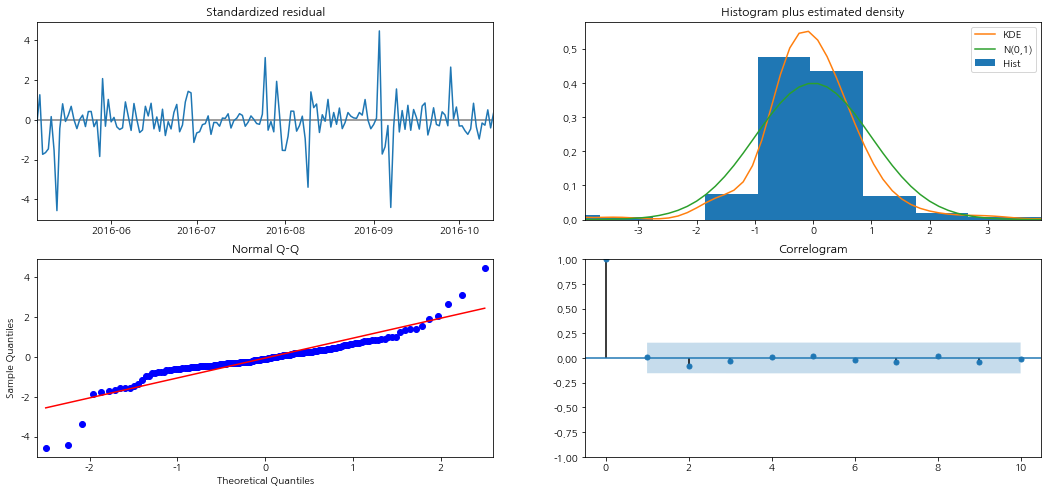

In [91]:
results.plot_diagnostics(figsize=(18, 8))
plt.show()

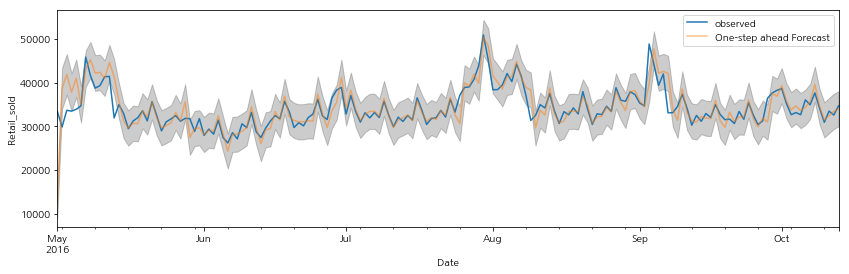

In [92]:
pred = results.get_prediction(full_results=True,dynamic=False)
pred_ci = pred.conf_int()
ax = y[:].plot(label='observed')

pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.5, figsize=(14, 4))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Retail_sold')

plt.legend()
plt.show()

In [93]:
pred.predicted_mean

2016-05-01    12551.786573
2016-05-02    38686.453764
2016-05-03    41875.430205
2016-05-04    37794.025826
2016-05-05    41023.737845
2016-05-06    35003.976033
2016-05-07    43162.331834
2016-05-08    45209.073296
2016-05-09    42188.357337
2016-05-10    42326.037457
2016-05-11    41001.114569
2016-05-12    44590.165056
2016-05-13    41340.852649
2016-05-14    35878.070750
2016-05-15    31297.871608
2016-05-16    29613.534316
2016-05-17    30717.221225
2016-05-18    30585.406694
2016-05-19    33551.870429
2016-05-20    32151.873265
2016-05-21    35607.039589
2016-05-22    31957.259645
2016-05-23    29663.659638
2016-05-24    30173.492679
2016-05-25    30818.206726
2016-05-26    33170.199694
2016-05-27    31224.048865
2016-05-28    35615.243029
2016-05-29    27482.189578
2016-05-30    29509.521630
                  ...     
2016-09-14    32235.127954
2016-09-15    31868.556349
2016-09-16    31783.003021
2016-09-17    35924.738013
2016-09-18    31298.183004
2016-09-19    29777.102705
2

In [94]:
y_forecasted = pred.predicted_mean
y_truth = y[:]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error is 8042726.04
The Root Mean Squared Error is 2835.97


In [95]:
len(df_forecast.drop('amount',axis=1))

7

In [96]:
_exog = df_forecast.drop('amount',axis=1)

pred_uc = results.get_forecast(steps=len(_exog),exog=_exog)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 4))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.legend()
plt.show()

/home/pirl/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:320: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


ValueError: Provided exogenous values are not of the appropriate shape. Required (7, 18), got (7, 7).

In [97]:
df_forecast.drop('amount',axis=1).shape

(7, 7)

In [98]:
df_new.tail()

,amount,month-5,month-6,month-7,month-8,month-9,month-10,weekday-0,weekday-1,weekday-2,weekday-3,weekday-4,weekday-5,weekday-6,weekend,2Q,3Q,4Q,querter_end
date,,,,,,,,,,,,,,,,,,,
2016-10-27,43300,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
2016-10-28,43885,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
2016-10-29,51680,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0
2016-10-30,49515,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0
2016-10-31,44300,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0


In [99]:
from random import random
[200 + random()]

[200.5931362143706]

In [100]:
y_forecasted = pred.predicted_mean
y_forecasted.head(12)

2016-05-01    12551.786573
2016-05-02    38686.453764
2016-05-03    41875.430205
2016-05-04    37794.025826
2016-05-05    41023.737845
2016-05-06    35003.976033
2016-05-07    43162.331834
2016-05-08    45209.073296
2016-05-09    42188.357337
2016-05-10    42326.037457
2016-05-11    41001.114569
2016-05-12    44590.165056
Freq: D, dtype: float64

In [101]:
pred_ci.head(24)

,lower amount,upper amount
2016-05-01,9157.029371,15946.543776
2016-05-02,33966.078995,43406.828533
2016-05-03,37225.812138,46525.048272
2016-05-04,33480.688466,42107.363187
2016-05-05,36737.487973,45309.987718
2016-05-06,30840.401139,39167.550927
2016-05-07,39009.514569,47315.149099
2016-05-08,41111.668120,49306.478473
2016-05-09,38096.248462,46280.466213
2016-05-10,38261.478057,46390.596858


In [102]:
forecast = pred_uc.predicted_mean
forecast.head(12)

2016-11-01    47225.756077
2016-11-02    46960.199635
2016-11-03    47724.277487
2016-11-04    48345.946557
2016-11-05    48789.647767
2016-11-06    49491.169407
2016-11-07    49948.314552
2016-11-08    50607.142518
2016-11-09    51110.140423
2016-11-10    51729.217156
2016-11-11    52263.706144
2016-11-12    52858.986905
Freq: D, dtype: float64

## 모델 분석

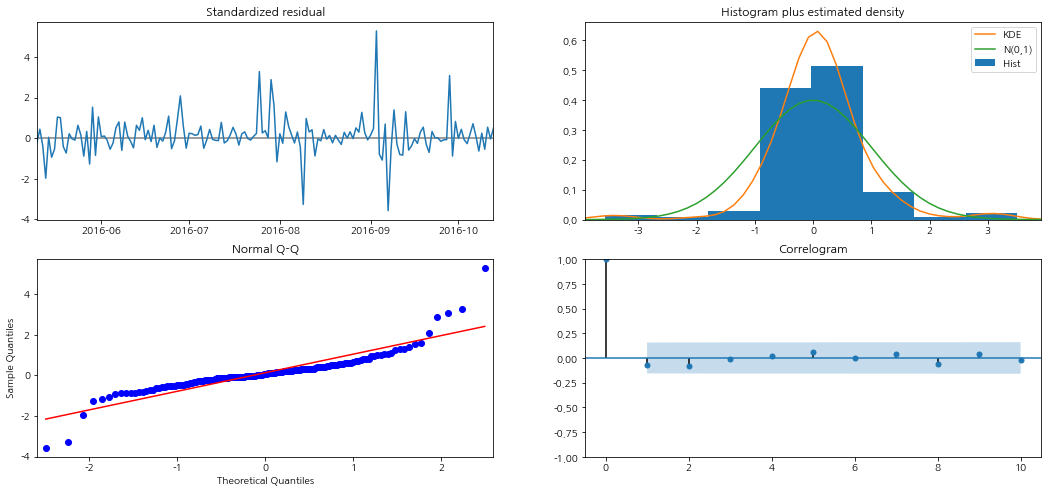

In [103]:
arimax.plot_diagnostics(figsize=(18, 8))
plt.show()

In [ ]:
mse

## 최적 모델 찾기

In [ ]:
# from sklearn.metrics import mean_squared_error

# li = []

# for i in range(7):
#     for j in range(2):
#         for k in range(7):
#             arimax = sm.tsa.statespace.SARIMAX(df_new_train['amount'],
#                                                order=(i,j,k),
#                  arimax.resid.plot();plt.show()                              seasonal_order=(0,0,0,0),
#                                                exog = df_new_train.drop(['amount'],axis = 1),
#                                                freq='D',
#                                                enforce_stationarity=False,
#                                                enforce_invertibility=False,).fit()

#             pred = arimax.predict(train_end,test_end,exog = df_new_test.drop(['amount'],axis = 1))[1:]
#             print('{},{},{} - ARIMAX model MSE:{}'.format(i,j,k,mean_squared_error(df_new_test['amount'],pred)))
#             li.append([i,j,k,mean_squared_error(df_new_test['amount'],pred)])
            
# arimax.summary()
# #We can use SARIMAX model as ARIMAX when seasonal_order is (0,0,0,0) .

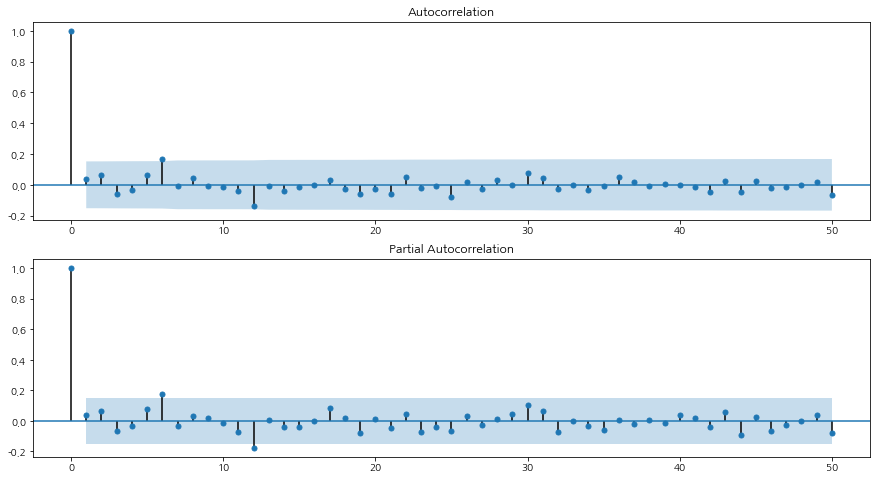

In [104]:
res = arimax.resid
fig,ax = plt.subplots(2,1,figsize=(15,8))
fig = sm.graphics.tsa.plot_acf(res, lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(res, lags=50, ax=ax[1])
plt.show()

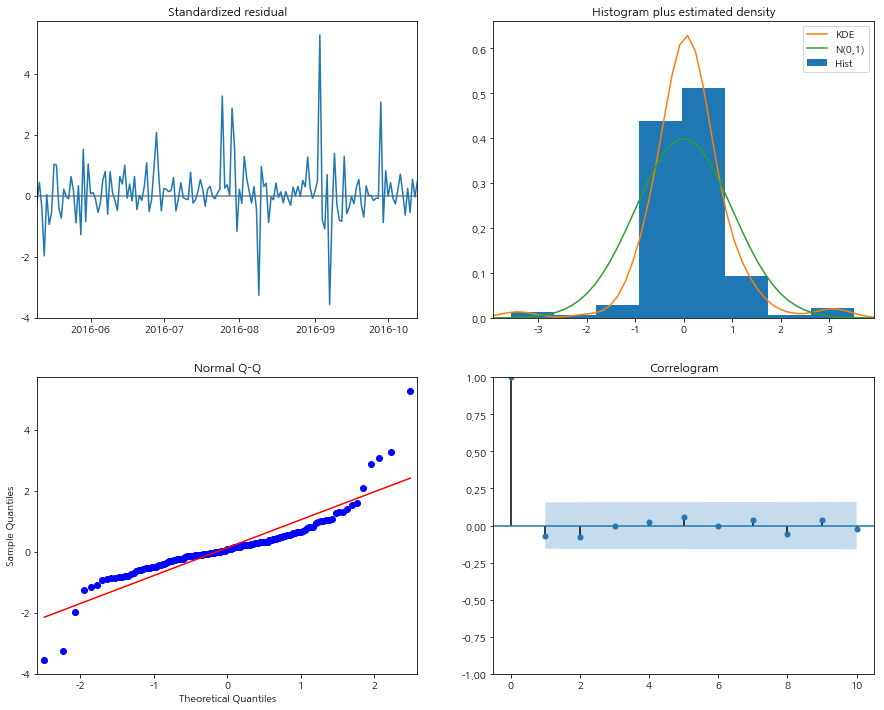

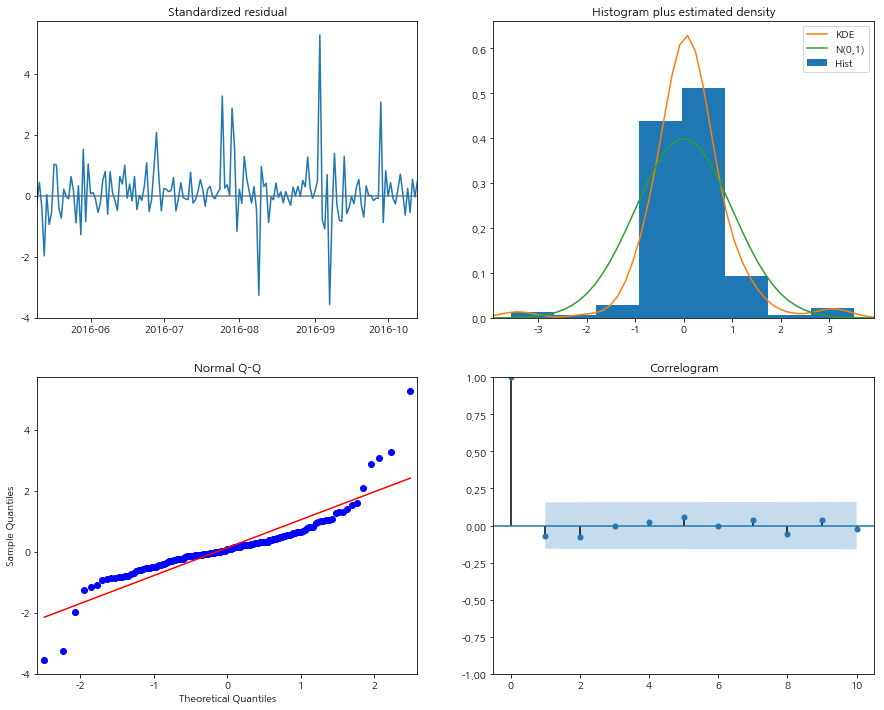

In [105]:
arimax.plot_diagnostics(figsize=(15, 12))

In [106]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font='IPAGothic')
import numpy as np
import statsmodels.api as sm

In [107]:
df=pd.read_csv('/home/pirl/Downloads/wine_data_sales.csv',engine='python',encoding='euc-kr',parse_dates=['date'])
df.head()

,Unnamed: 0,date,gender,age,job,marital,province,city,purchase,amount
0,0,2016-05-01,FEMALE,30대,임시직,SINGLE,충청도,청주시,"['D', 'F', 'D', 'G']",100
1,1,2016-05-01,FEMALE,30대,변호사,MARREID,서울시,양천구,"['C', 'G', 'E']",60
2,2,2016-05-01,MALE,60대 이상,회사직원,SINGLE,부산시,연제구,"['B', 'F']",30
3,3,2016-05-01,FEMALE,40대,중소기업직원,MARREID,서울시,양천구,['C'],15
4,4,2016-05-01,FEMALE,50대,의사,MARREID,경상도,거제시,"['G', 'A', 'B']",75
